In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Install required modules for this colab file

In [ ]:
!pip install pickle5
!pip install nltk
!pip install -U scikit-learn
!pip install pyenchant
!pip install PyMuPDF
!pip install networkx
!pip install pandas
!pip install numpy
!pip install germalemma
!pip install fpdf

In [ ]:
!apt install -qq enchant
!pip install pyenchant
import enchant
#/usr/share/hunspell

In [ ]:
!python -m pip install --upgrade pymupdf
import fitz

Lemmatizers and Stemmers

In [ ]:
!pip install HanTa
!pip install -U spacy


In [ ]:
!python3 -m spacy download de_core_news_md


In [7]:
!cd /content/drive/MyDrive/ColabNotebooks/Norm_Classifier
!cp /content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/de_DE_frami.aff /usr/share/hunspell/de_DE_frami.aff
!cp /content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/de_DE_frami.dic /usr/share/hunspell/de_DE_frami.dic

Pickle5 will be used for saving our  classification models, nltk as a natural language tokenizer, scikit for our machine learning tools, pyenchant as a spelling check for the german language, PyMuPDF for reading and working with PDF files and finally networkx to visualise our network in a concise dot net.

In [ ]:
import nltk
nltk.download('popular')

In [ ]:
!pip install python-docx

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install docx2pdf
!pip install compound-split

#2. Import required modules

In [11]:
import docx
from docx.enum.text import WD_COLOR_INDEX
from docx.enum.text import WD_COLOR
from fpdf import FPDF

In [12]:
import sys
import io
import os
import random
import string
import fitz
import time
import nltk
import glob
import warnings
import pickle
import enchant
import string
import re
import xml.etree.ElementTree as ET
import numpy as np
import pandas as pd
import logging
import numpy as np
import scipy.stats as stats
from compound_split import doc_split
from sklearn.metrics import make_scorer
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from collections import Counter
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from optparse import OptionParser
from enchant.checker import SpellChecker
import sys
from time import time
from HanTa import HanoverTagger as ht
import matplotlib.pyplot as plt
from string import punctuation
from nltk import word_tokenize
from collections import defaultdict
from nltk import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils import shuffle
from nltk.corpus import stopwords, treebank, words
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus.reader.xmldocs import XMLCorpusReader, XMLCorpusView
from nltk.stem.snowball import SnowballStemmer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.extmath import density
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


#Testing vectorizer & thesis snippets

In [ ]:
text = ['this is the first example for text classification',
'examples are important in this thesis',
'this bachelor thesis occupies itself with text classification']
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df

,are,bachelor,classification,example,examples,first,for,important,in,is,itself,occupies,text,the,thesis,this,with
0,0,0,1,1,0,1,1,0,0,1,0,0,1,1,0,1,0
1,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0
2,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,1


In [ ]:
text = ['this is the first example for text classification',
'examples are important in this thesis',
'this bachelor thesis occupies itself with text classification']
coun_vect = TfidfVectorizer()
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df

,are,bachelor,classification,example,examples,first,for,important,in,is,itself,occupies,text,the,thesis,this,with
0,0.000000,0.000000,0.298174,0.392063,0.000000,0.392063,0.392063,0.000000,0.000000,0.392063,0.000000,0.000000,0.298174,0.392063,0.000000,0.231559,0.000000
1,0.450504,0.000000,0.000000,0.000000,0.450504,0.000000,0.000000,0.450504,0.450504,0.000000,0.000000,0.000000,0.000000,0.000000,0.342620,0.266075,0.000000
2,0.000000,0.405419,0.308332,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405419,0.405419,0.308332,0.000000,0.308332,0.239447,0.405419


In [ ]:
data = {'Name':['John S.', 'Charles B.', 'Bob J.', 'Jay M.'], 'Grades':[4.0, 10.0, 6.0, 7.0]}  

In [ ]:

import pandas as pd
 
data = {'Name':['John S.', 'Charles B.', 'Bob J.', 'Jay M.'], 'Grades':[4.0, 10.0, 6.0, 7.0]}  
  
df = pd.DataFrame(data, index =['pos1', 'pos2', 'pos3', 'pos4'])  
  
print(df)

            Name  Grades
pos1     John S.     4.0
pos2  Charles B.    10.0
pos3      Bob J.     6.0
pos4      Jay M.     7.0


In [ ]:
df.loc['pos2']

Name      Charles B.
Grades          10.0
Name: pos2, dtype: object

In [ ]:
df['Name'] == 'Charles B.'

pos1    False
pos2     True
pos3    False
pos4    False
Name: Name, dtype: bool

In [ ]:
df[df['Name'] == 'Charles B.']

,Name,Grades
pos2,Charles B.,10.0


In [ ]:
df['Grades'].max()

10.0

In [ ]:
text = ['this is the first example for text classification',
'examples are important in this thesis',
'this bachelor thesis occupies itself with text classification']
for i in text:
  print(nltk.word_tokenize(i))

['this', 'is', 'the', 'first', 'example', 'for', 'text', 'classification']
['examples', 'are', 'important', 'in', 'this', 'thesis']
['this', 'bachelor', 'thesis', 'occupies', 'itself', 'with', 'text', 'classification']


In [ ]:
satz = "DIN 18800-2 Diese Norm regelt die Tragsicherheitsnachweise für stabilitätsgefährdete Stäbe und Stabwerke aus Stahl. Diese Norm gilt stets in Verbindung mit Gebrauchstauglichkeitsnachweise."
print(nltk.word_tokenize(satz))

['DIN', '18800-2', 'Diese', 'Norm', 'regelt', 'die', 'Tragsicherheitsnachweise', 'für', 'stabilitätsgefährdete', 'Stäbe', 'und', 'Stabwerke', 'aus', 'Stahl', '.', 'Diese', 'Norm', 'gilt', 'stets', 'in', 'Verbindung', 'mit', 'Gebrauchstauglichkeitsnachweise', '.']


In [ ]:
satz = "DIN 18800-2 Diese Norm regelt die Tragsicherheitsnachweise für stabilitätsgefährdete Stäbe und Stabwerke aus Stahl. Diese Norm gilt stets in Verbindung mit Gebrauchstauglichkeitsnachweise."#print(nltk.word_tokenize(satz))
lst = []
for i in nltk.word_tokenize(satz):
  lst.append(i.lower())
print(lst)

['din', '18800-2', 'diese', 'norm', 'regelt', 'die', 'tragsicherheitsnachweise', 'für', 'stabilitätsgefährdete', 'stäbe', 'und', 'stabwerke', 'aus', 'stahl', '.', 'diese', 'norm', 'gilt', 'stets', 'in', 'verbindung', 'mit', 'gebrauchstauglichkeitsnachweise', '.']


In [ ]:
stop_words = [] # empty list
with open('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/stop_words_german.txt', 'r', encoding = 'utf8') as datafile:
    for line in datafile:
        for word in line.split():
            stop_words.append(word)
            stop_words.append(string.capwords(word))


			
std_words_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/std_words.xlsx'
std_words_df = pd.read_excel(std_words_filename)
std_words_list = std_words_df.values.tolist()

for std_word in std_words_list:
  stop_words.append(std_word[0])
  stop_words.append(string.capwords((std_word[0])))

specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']
satz = "DIN 18800-2 Diese Norm regelt die Tragsicherheitsnachweise für stabilitätsgefährdete Stäbe und Stabwerke aus Stahl. Diese Norm gilt stets in Verbindung mit Gebrauchstauglichkeitsnachweise."#print(nltk.word_tokenize(satz))

tokens = nltk.word_tokenize(satz)
tst = []
for token in tokens:
  if token not in stop_words:
    if token not in specialchar:
      tst.append(token.lower())

print(tst)

['din', '18800-2', 'norm', 'regelt', 'tragsicherheitsnachweise', 'stabilitätsgefährdete', 'stäbe', 'stabwerke', 'stahl', 'norm', 'gilt', 'stets', 'verbindung', 'gebrauchstauglichkeitsnachweise']


In [ ]:
tst = []
s1 = "Hallo dies ist ein Test"
s2 = "Haloo dax is einn Tesst"
tokens = nltk.word_tokenize(s2)
deutsch = enchant.Dict("de_DE_frami")

for token in tokens:
  if deutsch.check(token) == True:
    print(token,' :Correct!')
  if deutsch.check(token) == False:
    print(token," :Error!")

Haloo  :Error!
dax  :Error!
is  :Error!
einn  :Error!
Tesst  :Error!


In [ ]:
tagger = ht.HanoverTagger('morphmodel_ger.pgz')
satz = "DIN 18800-2 Diese Norm regelt die Tragsicherheitsnachweise für stabilitätsgefährdete Stäbe und Stabwerke aus Stahl. Diese Norm gilt stets in Verbindung mit Gebrauchstauglichkeitsnachweise."#print(nltk.word_tokenize(satz))
tokens = nltk.word_tokenize(satz)
lemmas =[]

for token in tokens:
  lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(token.split())]                
  if lemma != ['--']:     
    lemma_low = (map(lambda x: x.lower(), lemma))           
    lemmas.append(' '.join(lemma_low))

print(lemmas)

['din', '18800-2', 'diese', 'norm', 'regeln', 'die', 'tragsicherheitsnachweis', 'für', 'stabilitätsgefährdete', 'stäbe', 'und', 'stabwerk', 'aus', 'stahl', 'diese', 'norm', 'gelten', 'stets', 'in', 'verbindung', 'mit', 'gebrauchstauglichkeitsnachweis']


#Testing XML

Best option with ElementTree, selecting body/sec

In [ ]:
from xml.etree import ElementTree

def xml_sector(xpath, doc):

  #tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")
  doc_path = "/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/"+doc
  tree = ElementTree.parse(doc_path)
  str_xpath = "*" + xpath

  body = tree.findall(str_xpath)
  element_map = dict()
  l_a = []
  l_e = []
  l_t = []
  att_dict = dict()

  for element in body:
    
    att_dict = element.attrib
    
    if 'id' in att_dict.keys():    
      element_map[att_dict['id']] = ' '.join(element.itertext()).replace('\n','')
      l_e.append(element)
      l_a.append(att_dict['id'])
      l_t.append(' '.join(element.itertext()).replace('\n',''))
      
      
    else:
      element_map[element] = ' '.join(element.itertext()).replace('\n','')
      l_e.append(element)
      l_a.append(att_dict)
      l_t.append(' '.join(element.itertext()).replace('\n',''))

  data_frame = {'ELEMENT': l_e, 'ATTRIBUTE': l_a, 'TEXT': l_t}
  xml_tag_df = pd.DataFrame(data_frame).dropna()

  return xml_tag_df

xml_sector("body/sec","30041688_DIN_EN_1993-3-1.xml")


,ELEMENT,ATTRIBUTE,TEXT
0,"[[], [], [[], [], [<Element 'label' at 0x7f2bb...",sub-1,1 Allgemeines 1.1 Anwendungsbereich 1.1.1 Anwe...
1,"[[], [], [[], [], [<Element 'label' at 0x7f2bb...",sub-2,2 Grundlagen für die Tragwerksplanung 2.1 Anfo...
2,"[[], [], [[], [], [<Element 'xref' at 0x7f2bb6...",sub-3,3 Werkstoffe 3.1 Baustahl (1) Zu Anforderungen...
3,"[[], [], [[], [], [], [<Element 'label' at 0x7...",sub-4,4 Dauerhaftigkeit 4.1 Korrosionsschutz (1) Abh...
4,"[[], [], [[], [], [], [<Element 'xref' at 0x7f...",sub-5,5 Tragwerksberechnung 5.1 Berechnungsmodelle z...
5,"[[], [], [[], [], [<Element 'inline-formula' a...",sub-6,6 Grenzzustände der Tragfähigkeit 6.1 Allgemei...
6,"[[], [], [[], [], [<Element 'list' at 0x7f2bb6...",sub-7,7 Grenzzustände der Gebrauchstauglichkeit 7.1 ...
7,"[[], [], [[]], [[<Element '{http://www.w3.org/...",sub-8,8 Versuchsgestützte Bemessung (1) Die Regelung...
8,"[[], [], [[], [], [<Element 'xref' at 0x7f2bb6...",sub-9,9 Ermüdung 9.1 Allgemeines (1) Für die Ermüdun...


Best option for now, using BeautifulSoup, find_all('p') and parent.get_text

In [ ]:
from bs4 import BeautifulSoup
source_file = "/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml"
raw_xml = open(source_file, 'r')
soup = BeautifulSoup(raw_xml)

# link = soup.find('p')
# parents = link.findParents(recursive=False)
# for parent in parents:
#     print(parent)

tag_list = soup.find_all('p')

count_lim = 0
text_list = []

for t in tag_list:
  
  text = t.parent.get_text(separator=' ', strip=True) # .get_text(separator=' ')
  if count_lim > 100:
    break 
  if text not in text_list:
    count_lim += 1    
    text_list.append(text)
  

text_list


#soup.find_all('p')
#link = soup.find('abstract')
#print(link.find_parents())

# tag = soup.find("div", text="inner")
# print tag.find_parent('div')

In [ ]:
from lxml import etree

tree = etree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")

bits_of_text = tree.xpath('//text()')

joined_text = ' '.join(bit.strip() for bit in bits_of_text if bit.strip() != '')

joined_text

'Oberirdische GFK-Tanks und -Behälter Teil 3: Auslegung und Herstellung Oberirdische GFK-Tanks und -Behälter — Teil 3: Auslegung und Herstellung — Deutsche Fassung EN 13121-3:2016 GRP tanks and vessels for use above ground Part 3: Design and workmanship GRP tanks and vessels for use above ground — Part 3: Design and workmanship — German version EN 13121-3:2016 Réservoirs et récipients en PRV pour applications hors sol Partie 3: Conception et fabrication Réservoirs et récipients en PRV pour applications hors sol — Partie 3: Conception et fabrication — Version allemande EN 13121-3:2016 n DIN st 13121 3 d1cabc30 de DIN EN 13121-3 DIN EN 13121-3:2016-10 DIN EN 13121-3 2016-10 DIN-Normenausschuss Chemischer Apparatebau (FNCA) 23.020.10 DIN EN 13121-3:2010-06 DIN EN 13121-3 Berichtigung 1:2012-05 © DIN Deutsches Institut für Normung e. V. • Jede Art der Vervielfältigung, auch auszugsweise, nur mit Genehmigung des DIN Deutsches Institut für Normung e. V., Berlin, gestattet. 2016 DIN glich, da

In [ ]:
from lxml import etree

tree = etree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")

# print([i.text for i in tree.xpath('header/para/paratext|'
#                                   'body/section/intro/text|'
#                                   'body/section/para/paratext|'
#                                   'body/section/items/part/para/paratext')])

#print([i.text for i in tree.xpath('//text()')])

#'//sec/*'

In [ ]:
tree = etree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")
root = tree.getroot()
filter_tag = 'p'

i = 0

de_Checker = SpellChecker("de_DE_frami")


for elem in tree.iter():
  if elem.tag in filter_tag or filter_tag == 'all_tag':    
    if type(elem.text) == str:
      if '\n' not in elem.text:
        if any(map(str.isdigit, elem.text)) == False:
          if len(elem.text) > 3:
            de_Checker.set_text(elem.text)
            for err in de_Checker:
              i += 1
              if i > 0:
                break
            print('text:'+elem.text,'tag:'+elem.tag)

In [ ]:
from bs4 import BeautifulSoup
source_file = "/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml"
raw_xml = open(source_file, 'r')
soup = BeautifulSoup(raw_xml)

# link = soup.find('p')
# parents = link.findParents(recursive=False)
# for parent in parents:
#     print(parent)

tag_list = soup.find_all('p')

count_lim = 0
text_list = []

first_link = soup.p
print(first_link)
for sibling in first_link.next_siblings:
    print(repr(sibling))


<p>glich, dass Tanks und Behälter aufgrund der künftigen Entwicklungen auf dem Gebiet der Harztechnologie für Betriebstemperaturen über + 120 °C geeignet sein werden. Sollte diese Situation eintreten und ein Hersteller sich diese Entwicklungen zu Nutze machen wollen, behalten alle anderen Anforderungen der Norm weiterhin ihre Gültigkeit, die Auslegung der betreffenden Tanks und Behälter muss jedoch ausschließlich nach dem in 7.9.2 angegebenen Verfahren erfolgen. Dieser Teil der EN 13121 gilt nicht für: — Tanks und Behälter für den Transport von Fluiden; — unterirdische Lagertanks; — kugelförmige Behälter; — Behälter und Tanks mit unregelmäßiger Form; — Tanks und Behälter mit doppelter Sicherheitshülle; — Tanks und Behälter, die bei Explosion oder Undichtheit die Emission radioaktiver Strahlungen zur Folge haben können; — einteilige und mehrteilige oberirdische faserverstärkte Tanks für die Lagerung von Kaltwasser (siehe EN 13280:2001).</p>
'\n'


In [ ]:
from xml.etree import ElementTree

tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")

parent_map = dict()
test_list = []

for parent in tree.iter():
  if parent.tag == 'sec':      
    # parent_map[parent] = [child.tag, grandchild.tag]
    #print(parent.attrib)
    att_dict = parent.attrib
    #parent_map[parent] = ' '.join(parent.itertext()).replace('\n','').replace('  ',' ')
    text_elem = ' '.join(parent.itertext()).replace('\n','').replace('  ',' ')
    if text_elem in test_list:
      test_list.append(text_elem)


parent_map
text_list

[]

In [ ]:
from xml.etree import ElementTree

tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")

parent_map = {child: parent for parent in tree.iter() for child in parent}

parent_map

In [ ]:
from xml.etree import ElementTree

tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")
#body = tree.findall(".//p/*")
#body = tree.findall("*//*[p]/parent::*")

# tag = 'p'
# str_xpath = "*//*"+str(tag)+"/.."
str_xpath = "*/body/sec"

body = tree.findall(str_xpath)

original_root = tree.getroot()

result = []
rsr = []

parent_map = dict()

# for elem in body:
#   print(elem.tag)
#   print(elem.attrib)
#   rsr.append(elem.text)

#print(rsr)
grp_dict = dict()
tt, st, ct = [],[],[]

for parent in body:
  #for text in parent.itertext():
  att_dict = parent.attrib
  parent_map[att_dict['id']] = ' '.join(parent.itertext()).replace('\n','').replace('  ',' ')

  # if parent in original_root.iter():
  #     print('sub tag:',parent.tag)
  #     print(parent.text)
  # print('------')
###############################################  
  #print('top tag:',parent.tag)
  #print(parent)
  # tt.append(parent.tag)
  child_text = ''
  for child in parent.getchildren():      
    grp_str = ''
    #print('sub tag:',child.tag)
    #print(child.text)
    tt.append(str(parent))    
    st.append(child.tag)
    ct.append(child.text)
  
  #print('------')
################################################
    # if type(child.text) == str:
    #   if '\n' not in child.text:
    #     if any(map(str.isdigit, child.text)) == False:
    #       if len(child.text) > 3:
            #grp_str += child.text
            #print(child.text)
   
  #grp_dict[group] = grp_str
data_frame = {'TOP TAG': tt, 'SUB TAG': st, 'TEXT': ct}
xml_tag_df = pd.DataFrame(data_frame).dropna()
#grp_dict
parent_map

In [ ]:
from xml.etree import ElementTree

tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")
tag = 'sec'
#str_xpath = "*//*"+str(tag)+"/.."
str_xpath = "*/body/sec"
body = tree.findall(str_xpath)

original_root = tree.getroot()

result = []
rsr = []

grp_dict = dict()
tt, st, ct = [],[],[]

for parent in body.itertext():
  tt.append(str(parent))    
  st.append(parent.tag)
  ct.append(parent)     

data_frame = {'TOP TAG': tt, 'SUB TAG': st, 'TEXT': ct}
xml_tag_df = pd.DataFrame(data_frame).dropna()
xml_tag_df

AttributeError: ignored

In [ ]:
xml_tag_df

In [ ]:
xml_tag_df[xml_tag_df['TEXT'] == 'Dieser Teil der EN 13121 legt Anforderungen für Auslegung, Fertigung, Prüfung und den Nachweis für oberirdische GFK-Tanks und –Behälter, mit oder ohne thermoplastische(r) Auskleidung fest, die im Werk oder auf der Baustelle gefertigt und drucklos oder bis zu']

In [ ]:
test_df = xml_tag_df.groupby(['TOP TAG'])['TEXT'].apply(' '.join).reset_index()
test_df[test_df['TOP TAG'] == "<Element 'def' at 0x7f3238f81170>"]
test_df

In [ ]:
test_df = xml_tag_df.groupby(['TOP TAG'])['TEXT'].apply(' '.join).reset_index()
test_df[test_df['TOP TAG'] == "<Element 'meta-note' at 0x7f323418a2f0>"]
test_df

In [ ]:
test = xml_tag_df.groupby(['TOP TAG'], as_index = False).agg({'TEXT': ' '.join})
test[test['TOP TAG'] == "<Element 'meta-note' at 0x7f323418a2f0>"]

In [ ]:
test = xml_tag_df.groupby(['TEXT'])
test

In [ ]:
def xml_tag_extractor(xml_doc, filter_tag):

    dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
    file_dir = dir + xml_doc


    tree = ET.parse(file_dir)
    root = tree.getroot()

    i = 0

    text = []
    document_name = []
    tags = []


    de_Checker = SpellChecker("de_DE_frami")


    for elem in tree.iter():
      if elem.tag in filter_tag:
        if type(elem.text) == str:
          if '\n' not in elem.text:
            if any(map(str.isdigit, elem.text)) == False:
              if len(elem.text) > 3:
                de_Checker.set_text(elem.text)
                for err in de_Checker:
                  i += 1
                  if i > 0:
                    break             
                text.append(elem.text)
                document_name.append(xml_doc)
                tags.append(elem.tag) 
                         
                         
    xml_extractor_dict = {'DOCUMENT NAME': document_name,'SENTENCE': text, 'TAG': tags}
    xml_extractor = pd.DataFrame(xml_extractor_dict)
    
    return xml_extractor
    
xml_tag_extractor_df = xml_tag_extractor('30008986_DIN_EN_13814.xml','sec')
xml_tag_extractor_df

#3. Set data directory and labels from Books_Classification

In [ ]:
BASE_DIR = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Book_Classfication'
LABELS = []
for label in os.listdir(BASE_DIR):
  LABELS.append(label)
print(LABELS)


['Sicherheit', 'Management', 'Fertigung', 'Logistik', 'Forschung_und_Entwicklung', 'Konstruktion', 'Kostenrechnung', 'Qualitaet', 'D1_corpus.xlsx']


Our data comes from different books on common topics from Mechanical Engineering. I have chosen easily available books from SpringerLink, since my University has a license with this publisher. The chosen areas were: Fertigung (Manufacturing), Forschung und Entwicklung (Research and Development), Konstruktion (Design Engineering), Kostenrechnung (Cost accounting), Logistik (Logistics), Management (Management), Qualität (Quality) and Sicherheit (Safety) with a heavy engineering focus. It may be that a few books vary in approach, but the our goal is to build a robust vocabulary in specific topics. The detailed book list can be visualised in this Google Drive folder, in the folder 'Books_Classification'.

#4. Create data set and generate data.pkl with the extracted data (not needed if /data.pkl was already created. Jump to next step if so.)

This task normally takes around 2 minutes and I would recommend not executing it unless content/sample_data/Files/data.pkl isn't available.

In [ ]:
### Loops through all .PDFs in folder ###
ll,fl,tl = [],[],[]    
for label in LABELS:        
    dir = '%s/%s' % (BASE_DIR, label)
    for filename in os.listdir(dir):                
        fullfilename = '%s/%s' % (dir, filename)                
        ### Opens on given file at time ###
        file_pdf =  fitz.open(fullfilename)
        txt =''                
        with file_pdf as doc:                
            for page in doc:
                ### Loops through all pages in a given .PDF ###
                txt += page.get_text()
        txt = txt.replace('\n', ' ')            
        ll.append(label)
        fl.append(filename)
        tl.append(txt)

data_frame = {'LABEL': ll, 'FILENAME': fl, 'TEXT': tl}
docs = pd.DataFrame(data_frame)

docs.to_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/data.pkl')

Pickle dataframe with raw sentences

#5. Generate D2_Corpus_Classification

In [ ]:
BASE_DIR_D2 = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/D2_Corpus_Classification'
LABELS_D2 = []
for label in os.listdir(BASE_DIR_D2):
  LABELS_D2.append(label)


### Loops through all .PDFs in folder ###
ll,fl,tl = [],[],[]    
for label in LABELS_D2:        
    dir = '%s/%s' % (BASE_DIR_D2, label)
    for filename in os.listdir(dir):                
        fullfilename = '%s/%s' % (dir, filename)                
        ### Opens on given file at time ###
        file_pdf =  fitz.open(fullfilename)
        txt = ''                
        with file_pdf as doc:                
            for page in doc:
                ### Loops through all pages in a given .PDF ###
                txt += page.get_text()
        txt = txt.replace('\n', ' ')            
        ll.append(label)
        fl.append(filename)
        tl.append(txt)

d2_data_frame = {'LABEL': ll, 'FILENAME': fl, 'TEXT': tl}
d2_docs = pd.DataFrame(d2_data_frame)

d2_docs.to_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/d2_data.pkl')

In [ ]:
d2_docs = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/d2_data.pkl')
d2_docs

,LABEL,FILENAME,TEXT
0,Konstruktion,Konstruktives Zeichnen Maschinenbau Technische...,Konstruktives Zeichnen Maschinenbau Ulrich K...
1,Konstruktion,Einführung in die Maschinenelemente Gestaltun...,Bernd Künne Einführung in die Maschinenelemen...
2,Konstruktion,Maschinenelemente Band 1 Konstruktion und Bere...,G. Niemann · H. Winter· B.-R. Höhn Maschinene...
3,Logistik,"Grundlagen der Logistik Begriffe, Strukturen u...",Grundlagen der Logistik Claus Muchna Hans Bran...
4,Logistik,"Produktion und Logistik, 9. Auflage (Hans-Otto...",Springer-Lehrbuch Für weitere Bände: http://ww...
5,Logistik,"Handbuch Logistik ((auth.), Dieter Arnold, Hei...",D. Arnold · H. Isermann · A. Kuhn · H. Tempe...
6,Management,Ingenieure Als Manager Schlsselqualif... (z-li...,Matthias Cebhard-Rheinwald Das Management 1 x...
7,Management,Produkthaftung Herausforderung an Man... (z-li...,Carl-Otto Bauer . Christian Hinsch Gerd Eidam...
8,Management,"Management für Ingenieure Grundlagen,... (z-l...","Klaus Müller Grundlagen, Techniken, Instrumen..."
9,Sicherheit,Auslegung von Konstruktionselementen... (z-lib...,Auslegung von Konstruktions­ elementen Dietri...


Generate D2 Corpus Filename list as excel file

In [ ]:
d2_docs_report = d2_docs[['LABEL','FILENAME']]
d2_docs_report.to_excel('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/D2_Corpus_Classification/D2_corpus.xlsx')

Tokenized and pickle generate df with D2 corpus

In [ ]:
d2_docs_tokenized = {}
d2_docs_tokenized_df = pd.DataFrame(d2_docs_tokenized)


d2_docs_tokenized_df['LABEL'] = d2_docs['LABEL']
d2_docs_tokenized_df['FILENAME'] = d2_docs['FILENAME']
d2_docs_tokenized_df['TERM'] = d2_docs['TEXT'].apply(lambda x: [token for token in tokenize_and_lemma(x)])
d2_docs_tokenized_df = d2_docs_tokenized_df.explode('TERM', ignore_index=True)

#d2_docs_tokenized_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/d2_docs_tokenized_df.pkl')
#unnecessary pickling

d2_docs_classified = d2_docs_tokenized_df.groupby(['TERM', 'LABEL']).size().unstack(fill_value=0)

d2_docs_classified.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/d2_data_tokenized.pkl')

d2_docs_classified



#6. Load generated docs from content/sample_data/Files/data.pkl and create Pandas dataframe

In [ ]:
docs = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/data.pkl')

### originally docs=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/data.txt',sep=' ',header=None, names = ['LABEL','FILENAME','TEXT'])

In [ ]:
docs.head()

,LABEL,FILENAME,TEXT
0,Sicherheit,Sicherheits-UndAntriebstechnik_Bernstein.pdf,Sicherheits- und Antriebstechnik Herbert Bern...
1,Sicherheit,SicherheitUndBetriebsfestigkeit_Sander.pdf,Sicherheit und Betriebsfestigkeit von Maschi...
2,Sicherheit,Anlagensicherheit_Stephan-Schulz.pdf,Anlagensicherheit Ursula Stephan Bernd Schulz-...
3,Sicherheit,Prozess-UndAnlagensicherheit_Hauptmanns.pdf,Prozess- und Anlagensicherheit Ulrich Hauptma...
4,Sicherheit,KonstruierenSicherheitsgerecht_Neudörfer.pdf,Konstruieren sicherheitsgerechter Produkte A...


Generate D1 Corpus Filename list as excel file

In [ ]:
docs_report = docs[['LABEL','FILENAME']]
docs_report.to_excel('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Book_Classfication/D1_corpus.xlsx')

Tokenize and pickle dataframe with LABEL, FILENAME and TERM

In [ ]:
docs['LABEL'].value_counts()

Logistik                     7
Sicherheit                   6
Management                   6
Fertigung                    6
Forschung_und_Entwicklung    6
Konstruktion                 6
Kostenrechnung               6
Qualitaet                    6
Name: LABEL, dtype: int64

In [ ]:
text_count = docs['TEXT'].str.len().sort_values(ascending=False)
frequency = {}
freq_df = pd.DataFrame(frequency)
freq_df['FILENAME'] = docs['FILENAME'][text_count.index]
freq_df['TEXT COUNT'] = text_count
freq_df['LABEL'] = docs['LABEL'][text_count.index]
freq_df.head()

,FILENAME,TEXT COUNT,LABEL
34,RoloffMatekMaschinenelemente_Wittel.pdf,2670383,Konstruktion
32,Konstruktionslehre_PahlBeitz.pdf,2486090,Konstruktion
4,KonstruierenSicherheitsgerecht_Neudörfer.pdf,2312266,Sicherheit
46,HandbuchQualität_Geiger-Kotte.pdf,1882377,Qualitaet
2,Anlagensicherheit_Stephan-Schulz.pdf,1785355,Sicherheit


#7. Load pre-labelled sentences from external sources (not from our Books Corpora) 

In [ ]:
sheets_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/Text_Labels.xlsx'
test_data_df = pd.read_excel(sheets_filename)
test_data_df

,SENTENCE,LABEL
0,Dieses Standardwerk zur Fertigungstechnik stel...,Fertigung
1,Mit einer internationalen Patentanmeldung (PCT...,Forschunng_und_Entwicklung
2,Maschinenelemente sind kleinste Bauteile von M...,Konstruktion
3,Die KLR ist ein institutionalisiertes Informat...,Kostenrechnung
4,High-Tech-Handling wird für die Fertigung eine...,Logistik
5,Unter einem Projekt versteht man eine zeitlich...,Management
6,Das Qualitätsingenieurwesen befasst sich mit M...,Qualitaet
7,Der Weg zur sicheren Maschine: Eine Maschine m...,Sicherheit
8,Die Prognose der Wälzlagerleistung während des...,Konstruktion
9,Unser erfahrenes Projektlogistik Team für Schw...,Logistik


#8. Generate stop words in german and tokenize
Stopwords do not provide useful information. Either they don't have any meaning (prepositions, conjunctions, etc.) or are too frequent. For this reason I'll filter them out from our dataset.Since most built-in stop words are in english (scikit) or insufficient (nltk) I have chosen to import them from a .txt file available [here](https://countwordsfree.com/stopwords/german). It can be that I will tweak and fine tune some of these words along the process. For instance, I have chosen to capitalise all of them and append to the same list, therefore I can filter out 'such' and 'Such'.

To Tokenize and Lemmatize my sentences I have written my own function.

In [ ]:
stop_words = [] # empty list
with open('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/stop_words_german.txt', 'r', encoding = 'utf8') as datafile:
    for line in datafile:
        for word in line.split():
            stop_words.append(word)
            stop_words.append(string.capwords(word))
            

Add standard words to stopwords

In [ ]:
std_words_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/std_words.xlsx'
std_words_df = pd.read_excel(std_words_filename)
std_words_list = std_words_df.values.tolist()

for std_word in std_words_list:
  stop_words.append(std_word[0])
  stop_words.append(string.capwords((std_word[0])))



In [ ]:
stop_words[-12:]

['abbildung',
 'Abbildung',
 'abb.',
 'Abb.',
 'bild',
 'Bild',
 'aachen',
 'Aachen',
 'kap',
 'Kap',
 'kapitel',
 'Kapitel']

In [ ]:
def tokenize_and_lemma(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []

    lemmas = []
    
    stemmer = SnowballStemmer("german")

    tagger = ht.HanoverTagger('morphmodel_ger.pgz')

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:        
        if any(map(lambda x: [x for x in specialchar],token)):
          if token not in stop_words:
            if '-' in token:                  
              token = token.replace('-','')
            elif '.' in token:                  
              token = token.replace('.','')
            if len(token) > 2:
              if deutsch.check(token) == True:
                lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(token.split())]                
                if lemma != ['--']:     
                  lemma_low = (map(lambda x: x.lower(), lemma))           
                  lemmas.append(' '.join(lemma_low))                  
    return lemmas

Example sentence for tokenizing and lemmatizing

In [ ]:
s1 = 'Schraube ist sicher.'
tokenize_and_lemma(s1)

['schrauben', 'sicher']

In [ ]:
s2 = 'Diese Schraube eignet sich laut DIN XXX für eine sichere Verbindung zwischen zwei unterschiedlichen Bauteilen.'
tokenize_and_lemma(s2)

['schrauben',
 'eignen',
 'laut',
 'din',
 'sicher',
 'verbindung',
 'unterschiedlich',
 'bauteil']

In [ ]:
#text = [s1,s2]
t1 = tokenize_and_lemma(s1)
t2 = tokenize_and_lemma(s2)
text = [str(t1),str(t2)]
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(text)
count_array = count_matrix.toarray()
df = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
df

,bauteil,din,eignen,laut,schrauben,sicher,unterschiedlich,verbindung
0,0,0,0,0,1,1,0,0
1,1,1,1,1,1,1,1,1


In [ ]:
test = "Das Qualitätsingenieurwesen befasst sich mit Methoden der Qualitätssicherung und deren Normzusammenhängen (DIN EN ISO 9000 ff.) sowie (Qualitäts-)Managementsystemen unter ingenieurwissenschaftlichen Fragestellungen. Dabei liegt der Fokus u. a. auf den QM-Modellen EFQM, Six Sigma sowie den Prinzipien des TQM. Einführung Unternehmen müssen die Prozess- und Produktionssicherheit uneingeschränkt sicherstellen."
test2 = "Aachen ist eine tolle Stadt. Im Kapitel 5 und Kap 5, aachen wird beschrieben. In Abbildung 5, Abb 7, Abb. 8, abb 9 sind Bilder vorhanden. Bild und bild sind gut. Kap und kap. kap. kap"
satz = "DIN 18800-2 Diese Norm regelt die Tragsicherheitsnachweise für stabilitätsgefährdete Stäbe und Stabwerke aus Stahl. Diese Norm gilt stets in Verbindung mit Gebrauchstauglichkeitsnachweise."
token_list = tokenize_and_lemma(satz)
print(token_list)


# print(docs['TEXT'][15][7000:7200])
# tokenize_and_lemma(docs['TEXT'][15][7000:7200])





['din', 'norm', 'regeln', 'tragsicherheitsnachweis', 'stäbe', 'stahl', 'norm', 'gelten', 'stets', 'verbindung']


#9.Pickle dataframe with tokenized sentences from Book Corpus D1

In [ ]:
docs_tokenized = {}
docs_tokenized_df = pd.DataFrame(docs_tokenized)

#docs2 = docs[0:3]
docs_tokenized_df['LABEL'] = docs['LABEL']
docs_tokenized_df['FILENAME'] = docs['FILENAME']
docs_tokenized_df['TERM'] = docs['TEXT'].apply(lambda x: [token for token in tokenize_and_lemma(x)])
docs_tokenized_df = docs_tokenized_df.explode('TERM', ignore_index=True)

docs_tokenized_df

In [ ]:
docs_tokenized_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/docs_tokenized_neu_df.pkl')
#docs_tokenized_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/docs_tokenized_df.pkl')

Load tokenized docs

In [ ]:
#docs_tokenized_df = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/docs_tokenized_df.pkl')
docs_tokenized_df = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/docs_tokenized_neu_df.pkl')

In [ ]:
docs_tokenized_df.describe()

,LABEL,FILENAME,TERM
count,2176088,2176088,2176088
unique,8,48,113592
top,Logistik,Konstruktionslehre_PahlBeitz.pdf,hoch
freq,393330,130137,8664


In [ ]:
data_tokenized = docs_tokenized_df.groupby(['TERM', 'LABEL']).size().unstack(fill_value=0)

In [ ]:
#old books and stop words
#data_tokenized.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/data_tokenized.pkl')
data_tokenized.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/data_tokenized_neu.pkl')

In [ ]:
docs_classified

LABEL,Fertigung,Forschung_und_Entwicklung,Konstruktion,Kostenrechnung,Logistik,Management,Qualitaet,Sicherheit
TERM,,,,,,,,
a.c.,0,0,0,0,1,0,0,0
a.m.,0,0,0,0,0,0,0,1
a.w.,0,0,1,1,4,0,0,0
aachen,398,26,70,18,32,4,13,9
aale,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
übungsheft,0,0,1,0,0,0,0,0
übungsinhalte,0,1,0,0,0,0,0,0
übungsprozeß,0,0,0,0,1,0,0,0


Experimental - count amount of terms per document instead of total words

In [ ]:
# grouped = test_df.groupby(['TERM'])

# result = grouped['FILENAME'].agg(['count'])

#result['FILENAME'] = np.select(condlist= [1,2], choicelist = [1, 0], default = np.nan)

result2 = docs_tokenized_df.groupby(['TERM','LABEL']).agg({'FILENAME': pd.Series.nunique}).unstack(fill_value=0)
result2 = result2['FILENAME']
result2

sorted = 'Konstruktion'
result2.sort_values([sorted], ascending=False).groupby(sorted).head(5)
result2.to_pickle('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/result2.pkl')

LABEL,Fertigung,Forschung_und_Entwicklung,Konstruktion,Kostenrechnung,Logistik,Management,Qualitaet,Sicherheit
TERM,,,,,,,,
a.c.,0,0,0,0,1,0,0,0
a.m.,0,0,0,0,0,0,0,1
a.w.,0,0,1,1,2,0,0,0
aachen,5,3,4,2,6,2,3,3
aale,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
übungsheft,0,0,1,0,0,0,0,0
übungsinhalte,0,1,0,0,0,0,0,0
übungsprozeß,0,0,0,0,1,0,0,0


#10. Finding best model and hyper parameter tunning using GridSearchCV

Select models and vectorizers

In [ ]:
model_params = {
    'LinearSVC': {
        'model': LinearSVC(dual=False, tol=1e-3),
        'params' : {
            'penalty':['l1','l2'],
            'C': [20,50,200]
        }  
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [5,10,20,50,200],
            'kernel': ['rbf','linear']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,20,50,200]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1,0.5,1,50,100]
        }
    },
    'complement_multinomial': {
        'model': ComplementNB(),
        'params': {
            'alpha': [0.1,0.5,1,50,100]
        }
    },    
    'BernoulliNB': {
        'model': BernoulliNB(),
        'params': {
            'alpha': [0.1,0.5,1,50,100]
        }
    },
    'Perceptron': {
        'model': Perceptron(max_iter=100),
        'params': {
            'penalty':['l1','l2'],
            'alpha': [0.1,0.5,1,50,100]
        }
    },
    'PassiveAggressiveClassifier': {
        'model': PassiveAggressiveClassifier(max_iter=30),
        'params': {
            'C': [1,5,10,20,50,200],
            
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,10,20,25]            
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [5,10,20,25]
        }                   
    },
    'RidgeClassifier': {
        'model': RidgeClassifier(tol=1e-2, solver="auto"),
        'params' : {
            'alpha': [0.1,0.5,1,50,100]
        }
    } 
}


First we'll generate a RandomSearchCV then fine tune a GridSearchCV in order to spare some processing time

In [ ]:
doc_shuffled = shuffle(docs) 

X = doc_shuffled['TEXT']
Y = doc_shuffled['LABEL']

vectorizer = TfidfVectorizer(analyzer = 'word', tokenizer=tokenize_and_lemma, ngram_range=(1,3),use_idf=True,min_df=0.15,sublinear_tf=True)
#vectorizer = CountVectorizer(analyzer = 'word', tokenizer=tokenize_lemma_split,ngram_range=(1,2),min_df= 0.15)

X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, Y, test_size=1/5, random_state=42,stratify = Y, shuffle = True)

In [ ]:
### Predict phrases from outside the corpus ###
# doc_f ="Dieses Standardwerk zur Fertigungstechnik stellt das Wissen zur Verfügung, das Produktionsplaner, Fertigungstechniker und Konstrukteure brauchen, um Produktivitätssteigerungen und Kostensenkungen zu erreichen. Dazu gehören neben dem Grundlagenwissen auch ausreichende Kenntnisse über die neuesten technologischen Entwicklungen.Die Wirtschaftlichkeit der industriellen Produktion hängt wesentlich von der optimalen Auswahl der Fertigungsverfahren ab. Daher wurde der Klassiker der Fertigungstechnik auch für die 12. Auflage auf den aktuellen Stand gebracht. Die Abschnitte zum Gießen von Motoren im Pkw-Leichtbau wurden aktualisiert. Neu hinzugekommen ist das Fügen durch Umformen, da es eine wichtige Rolle für die Kfz-Fertigung spielt. Ebenfalls neu aufgenommen wurden Abschnitte zu den Fertigungsschritten für Windkraftanlagen. Das Kapitel über additive Fertigungsverfahren (Rapid Prototyping) wurde wegen der rasanten Entwicklung auf diesem Gebiet wesentlich erweitert.Die Grundlagen der Fertigungstechnik werden in diesem Standardwerk bewusst knapp, aber leicht verständlich behandelt. Die Fertigungsverfahren werden mit zahlreichen Bildern und Diagrammen anschaulich beschrieben. Alle Kapitel enthalten jeweils einen ausführlichen Abschnitt über die zweckmäßige konstruktive und fertigungstechnische Gestaltung der einzelnen Werkstücke. Das Buch dient Studierenden als Basisliteratur. Für Praktiker in Fertigungsbetrieben sowie in Konstruktions- und Ingenieurbüros ist es ein kompaktes Nachschlagewerk."   
# doc_fe = "Mit einer internationalen Patentanmeldung (PCT-Verfahren) erwirbt man das Recht, nacheinem gewissen Zeitraum in nahezu jedem Land der Erde ein nationales Erteilungsverfahrenzu beginnen. Für eine internationale Patentanmeldung1 gelten die Bestimmungendes PCT-Vertrags.2 Eine PCT-Anmeldung wird auch als WO-Anmeldung bezeichnet, da„WO“ das Länderpräfix der Veröffentlichungsnummern der PCT-Anmeldungen ist. DieWorld Intellectual Property Organisation (WIPO) in Genf ist, neben den nationalen undsupranationalen Patentämtern (beispielsweise das Europäische Patentamt), zuständig fürdie Administration von PCT-Anmeldungen. Ein deutscher Anmelder kann seine internationaleAnmeldung beim deutschen Patentamt, dem Europäischen Patentamt oder demWIPO in Genf einreichen.Ein PCT-Verfahren führt nicht zu einem internationalen Patent oder einem Bündelnationaler Patente wie bei einem europäischen Verfahren. Stattdessen können mit einerinternationalen Anmeldung nationale Patentanmeldungen in beliebigen Ländern der Erdeerhalten werden. Der große Vorteil des PCT-Verfahrens ist, dass der jeweilige Beginndes nationalen Patenterteilungsverfahrens hinausgezögert werden kann. Hierdurch wirdZeit für die Entscheidung gewonnen, in welchem Land tatsächlich ein Patent angestrebtwerden soll. Nach dem Ende des PCT-Verfahrens wird die internationale Patentanmeldungin nationale Patentanmeldungen überführt und die nationalen Erteilungsverfahrenbeginnen. Mit dem PCT-Verfahren startet ein nationales Erteilungsverfahrenspätestens 30 bzw. 31 Monate nach dem Anmeldetag. Wurde eine Priorität in Anspruch"
# doc_k = "Maschinenelemente sind kleinste Bauteile von Maschinen die besonders häufig genutzt werden und daher oft genormt sind und zugekauft werden können. Dazu zählen beispielsweise Kleinteile wie Schrauben, Bolzen und Stifte, Zahnräder, Federn, Dichtringe, zusammengesetzte Teile wie Kugellager bis hin zu ganzen Komponenten wie Getrieben, Kupplungen und Bremsen. Außerdem gibt es noch verschiedene Verbindungselemente wie Schweißverbindungen, Lötverbindungen, Nietverbindungen und Klebverbindungen, Elemente zur Übertragung von Bewegungen wie Achsen und Wellen und Gleitlager."
# doc_kr = "Die KLR ist ein institutionalisiertes Informationssystem, das alle wirtschaftlich auswertbaren Vorgänge der Informationsgewinnung und -verarbeitung über angefallene oder geplante Geschäftsvorgänge beinhaltet und vorwiegend an Unternehmensinterne gerichtet ist. Die KLR dient der Ermittlung von Kosten- und Leistungsinformationen zur besseren Übersichtlichkeit der Betriebsbilanz. Hauptaufgabe der KLR ist der Nachweis des Werteverzehrs von betriebswirtschaftlichen Produktionsfaktoren bezogen auf die Wertschöpfungskette in einer Rechnungsperiode.Ziele und Aufgaben der KLR sinddie Wirtschaftlichkeitskontrolle der Prozesse, Kostenstellen, Abteilungen bzw. Betriebe mittels Soll/Ist-Vergleich, Zeitvergleich oder Institutionenvergleich,die Kostenkalkulation und Nachkalkulation und Bewertung der Kostenträger,die Ermittlung von Selbstkosten für öffentliche Aufträge auf Basis des Preisgesetzes,Gewinnung von Informationen als Basis für Entscheidungsrechnungen, z. B. über Eigenfertigung oder Fremdbezug (Produktpolitik) oder Annahme oder Abgabe von Angeboten (Preispolitik),Ermöglichung der Umsetzung einer kurzfristigen Erfolgsrechnung (kER); Voraussetzung ist eine korrekte Kosten- und Leistungserfassung,Bewertung der Warenvorräte in der Jahresbilanz,Erfassung aller Kosten und Leistungen.Grundsätzlich gilt für die Einführung oder Beibehaltung der Kostenrechnung, dass diese Aufgaben selbst nicht mehr Kosten verursachen dürfen, als sie Einsparungen und Wertschöpfung – im Sinne der Informationsbeschaffung – für den Betrieb bringen.Für alle Kostenrechnungsverfahren mit der retrospektiven Analyse gilt wegen der fehlenden Bindung an den bereits abgelaufenen Prozess, dass sie keinen steuernden Eingriff in das laufende betriebliche Geschehen erlauben."
# doc_l = "High-Tech-Handling wird für die Fertigung einer Maschine benötigt. Eine Industrieanlage soll in Asien abgebaut, nach Europa transportiert und dort wieder aufgebaut werden. Groß-Colli müssen aus mehreren Ländern zeitgleich auf einer Baustelle eintreffen. Ob klein oder groß, leicht oder schwer – wir finden für jedes Bauteil geeignete Transportlogistik und sorgen für eine schlanke Linie Ihrer Just-in-time-Produktion. Ihr Stückgut distribuieren wir nach festem Fahrplan oder individuell. Nebenbei kümmern wir uns um die Verzollung Ihrer internationalen Warensendungen und unterstützen Ihre Dokumentenlogistik. Ob national oder international, zu Wasser, via LkW-Transport, Schienentransport, Seefracht und Luftfracht: Wir holen die Komponenten für Ihre Vorhaben und Projekte im Anlagen- und Maschinenbau direkt bei Ihren Zulieferern ab. Wir bündeln Warenströme, konsolidieren an strategischen Knotenpunkten und gewährleisten die Ver- und Entsorgung Ihrer Produktion. Für Gefahr- und Spezialgut verfügen wir über das richtige Equipment zum Transport und der Aufbewahrung der Güter. Neben Linienverkehren mit festen Abfahrten versorgen wir Ihre Produktionslinie mit Just-in-time-Verkehren und Charterservices."
# doc_m = "Unter einem Projekt versteht man eine zeitlich und sachlich begrenzte insich abgeschlossene Aufgabe, deren erfolgreiche Erledigung das Projektzielrealisiert. Wesentliche Merkmale eines Projekts sind daher:– Existenz eines Projektziels,– zeitliche Begrenzung durch einen Projektbeginn und ein Projektende,– vorgegebener Ressourcenrahmen (Budget, 6.1.3).Projekte können einen sehr unterschiedlichen Umfang besitzen, angefangenvon Aufgaben, die neben der Alltagsarbeit durchgeführt und von denen meistmehrere gleichzeitig bearbeitet werden, bis hin zu sehr großen Projekten, dieeine eigene Projektorganisation erfordern und aus mehreren Teilprojektenbestehen können. Beispiele ersterer sind kleinere Kundenaufträge oder betriebsinterneAufgaben wie Total Quality Maßnahmen, Erstellung einer BalancedScore Card, Forschungsprojekte, die Entwicklung neuer Produkte oderder Bau einer neuen Fertigungsstätte. Beispiele letzterer sind die häufig sehrkomplexen Projekte des Anlagengeschäfts, wie der Bau eines Kraftwerks odereiner Raffinerie (7.1.8)."
# doc_q = "Dazu werden Stichproben genommen und ausgewertet. Aus dem Vergleich der Stichprobenergebnisse mit Grenzwerten können, wenn nötig, geeignete Eingriffe in den Prozess ausgelöst werden. Das wichtigste Werkzeug hierfür sind Qualitätsregelkarten, deren Auslegung und  Handhabung ausführlich erläutert wird."
# doc_s = "Der Weg zur sicheren Maschine: Eine Maschine muss nachweislich sicher sein; das heißt eine bestimmungsgemäße Funktion ausführen, ohne dabei die Sicherheit und Gesundheit von Personen zu gefährden. Wie aber ist der Weg zur sicheren Maschine und welche Normen helfen Ihnen, eine – über den gesamten Lebenszyklus – sichere Maschine zu konstruieren?Safety StandardsIn der A-Norm EN 12100 wird der Weg zur sicheren Maschine festgelegt. Zu Beginn steht dabei immer die Analyse der Risiken der Maschine. Werden bei dieser Analyse bestehende Gefährdungen aufgedeckt, muss das Gefährdungsrisiko mit geeigneten Maßnahmen gemindert werden.Risikominderung an einer MaschineAlle Schutzmaßnahmen zur Beseitigung von Gefährdungen oder zur Minderung des Gefährdungsrisikos sind nach EN ISO 12100 in einer fest vorgegebenen Reihenfolge, der 3-Stufen-Methode, zu ergreifen:Safety DangersGefahren vermeidenIm ersten Schritt wird versucht das Risiko zu eliminieren oder zu reduzieren durch konstruktive Maßnahmen während der Planungs- und Entwicklungsphase der Maschine.Gefahren sichernIm zweiten Schritt werden zur Reduzierung des Gefährdungsrisikos Schutzmaßnahmen getroffen, die auf dem Einsatz von sicherheitsrelevanten Steuerungsteilen beruhen.Lesen Sie mehr zu Sicherheitsfunktione nAuf Restgefahren hinweisen Im dritten Schritt soll das Risiko reduziert werden durch Unterrichtung und Warnhinweise über die Restrisiken."

# labels = ['Fertigung','Forschung_und_Entwicklung','Konstruktion','Kostenrechnung','Logistik','Management','Qualitaet','Sicherheit']
# text = [doc_f,doc_fe,doc_k,doc_kr,doc_l,doc_m,doc_q,doc_s]  

labels = test_data_df['Label']
text = test_data_df['Sentence']

vect = vectorizer.transform(text)

scores = []
for model_name, mp in model_params.items():
  print(model_name)    
  clf =  RandomizedSearchCV(mp['model'], mp['params'], n_iter=4)  

  #clf.fit(dtm.toarray(), y_train)
  clf.fit(X_train.toarray(),y_train)

  
  #y_pred = clf.predict(X_test.toarray())
  y_pred =  clf.predict(vect.toarray())
  y_test = labels

  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_,
      'precision': metrics.precision_score(y_test, y_pred,average = 'weighted', zero_division=0),
      'recall': metrics.recall_score(y_test, y_pred,average = 'weighted', zero_division=0),
      'f1': metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0)
  }) 
      
df = pd.DataFrame(scores,columns=['model','best_score','precision','recall','f1','best_params'])
df['mean'] = df.mean(axis=1)


In [ ]:
df.nlargest(4,['mean'])

Since this is a Randomized Search, the top results differ every time the algorithm runs. I will choose Complement Multinomial, KNeighborsClassifier, Naive Bayes Multinomial and SVM to be fine-tuned with GridSearchCV. The parameters will fluctuate around their order size in order to fine tune them.

In [ ]:
model_params_ft = {
    'complement_multinomial': {
        'model': ComplementNB(),
        'params': {
            'alpha': [0.05,0.1,0.2,0.5,1,2]
        }
    },
	
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [5,10,20,25]            
        }
    },
	    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.05,0.1,0.5,0.75,1,2]
        }
    },
	    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [0.5,1,2,5,10],
            'kernel': ['rbf','linear']
        }
    }
}

In [ ]:
labels = test_data_df['Label']
text = test_data_df['Sentence']

vect = vectorizer.transform(text)



scores = []
for model_name, mp in model_params_ft.items():
  print(model_name)    
  clf =  GridSearchCV(mp['model'], mp['params'])
  #clf.fit(dtm.toarray(), y_train)
  clf.fit(X_train.toarray(),y_train)
  #y_pred = clf.predict(X_test.toarray())
  y_pred =  clf.predict(vect.toarray())
  y_test = labels

  scores.append({
      'model': model_name,
      'best_score': clf.best_score_,
      'best_params': clf.best_params_,
      'precision': metrics.precision_score(y_test, y_pred,average = 'weighted', zero_division=0),
      'recall': metrics.recall_score(y_test, y_pred,average = 'weighted', zero_division=0),
      'f1': metrics.f1_score(y_test, y_pred, average = 'weighted', zero_division=0)
  }) 
      
df_ft = pd.DataFrame(scores,columns=['model','best_score','precision','recall','f1','best_params'])
df_ft['mean'] = df_ft.mean(axis=1)

In [ ]:
print(df_ft.nlargest(1,['mean']))

NameError: ignored

#11. Split, Vectorize and use Classifier and pickle

In [ ]:
doc_shuffled = shuffle(docs)

X = doc_shuffled['TEXT']
y = doc_shuffled['LABEL']

vectorizer = TfidfVectorizer(analyzer = 'word', tokenizer=tokenize_and_lemma, ngram_range=(1,3),use_idf=True,min_df=0.15,sublinear_tf=True)
X_vec = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=1/4, random_state=42,stratify = y, shuffle = True)

In [ ]:
classifier = ComplementNB(alpha=0.5).fit(X_train.toarray(),y_train)
#classifier = MultinomialNB(alpha=0.05).fit(X_train.toarray(),y_train)
#classifier = RidgeClassifier().fit(X_train.toarray(),y_train)
#classifier = LinearSVC(C=100, tol=0.01,dual=False).fit(X_train.toarray(),y_train)
#classifier = LogisticRegression(C=20).fit(X_train.toarray(),y_train)
#classifier = PassiveAggressiveClassifier(C=7.5).fit(X_train.toarray(),y_train)


Double check on the same phrases:

In [ ]:
labels = test_data_df['LABEL']
text = test_data_df['SENTENCE']

pred =  classifier.predict(vectorizer.transform(text))

print(pred)
print(labels)

['Forschung_und_Entwicklung' 'Forschung_und_Entwicklung' 'Konstruktion'
 'Kostenrechnung' 'Logistik' 'Forschung_und_Entwicklung' 'Logistik'
 'Sicherheit' 'Forschung_und_Entwicklung' 'Logistik' 'Logistik'
 'Forschung_und_Entwicklung']
0                      Fertigung
1     Forschunng_und_Entwicklung
2                   Konstruktion
3                 Kostenrechnung
4                       Logistik
5                     Management
6                      Qualitaet
7                     Sicherheit
8                   Konstruktion
9                       Logistik
10                      Logistik
11    Forschunng_und_Entwicklung
Name: LABEL, dtype: object


Pickle (save) vectorizer, vectorized text (X_vec) and  classifier as .pkl files

In [ ]:
clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
pickle.dump(classifier,open(clf_filename,'wb'))

vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
pickle.dump(vectorizer, open(vec_filename,'wb'))

x_vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/x_vec.pkl'
pickle.dump(X_vec, open(x_vec_filename,'wb'))

y_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/y.pkl'
pickle.dump(y, open(y_filename,'wb'))

#12.Use a learning curve to find out the ideal amount of data

In [ ]:
# load Y (vectorized text from data)
y_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/y.pkl'
y = pickle.load(open(y_filename, 'rb'))

# load X_vec (vectorized text from data)
x_vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/x_vec.pkl'
X_vec = pickle.load(open(x_vec_filename, 'rb'))

# load classifier 
clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
classifier = pickle.load(open(clf_filename, 'rb'))

#vectorize the new text
vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
vectorizer = pickle.load(open(vec_filename, 'rb'))

In [ ]:
text = 'Dieses Standardwerk zur Fertigungstechnik stellt das Wissen zur Verfügung, das Produktionsplaner, Fertigungstechniker und Konstrukteure brauchen, um Produktivitätssteigerungen und Kostensenkungen zu erreichen.'
print(vectorizer.transform([text]))

  (0, 9231)	0.4992686598590752
  (0, 7329)	0.47968688448902586
  (0, 2832)	0.4893778582204104
  (0, 1525)	0.5302269419930858


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=1/4, random_state=42,stratify = y, shuffle = True)

In [ ]:
def evaluate_classifier_self(y_true,y_pred):       
  #y_pred = classifier.predict(vect)
  #y_predicted = classifier.predict(y_pred)

  y_predicted = y_pred
  #y_true = labels  

  f1 = metrics.f1_score(y_true, y_predicted, average = 'weighted', zero_division=0)
  pr = metrics.precision_score(y_true, y_predicted, average = 'weighted', zero_division=0)
  rec = metrics.recall_score(y_true, y_predicted,average = 'weighted', zero_division=0)

  avg = (f1+pr+rec)/3
  
  return f1

scorer = make_scorer(evaluate_classifier_self, greater_is_better=True)

In [ ]:
evaluate_classifier_self(y,classifier.predict(X_vec))
scorer(classifier,X_vec,y)

0.8904128279128279

[learning_curve] Training set sizes: [ 3 11 19 27 36]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.9s finished


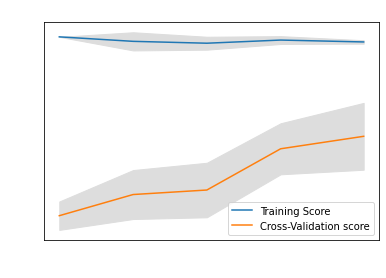

In [ ]:
cv = ShuffleSplit(test_size=1/4, random_state=42)
scoring_function = 'F1 Value'

#train_sizes, train_scores, test_scores = learning_curve(ComplementNB(alpha=0.01),X_vec,Y, scoring= evaluate_classifier(ComplementNB(alpha=0.01),X_vec,Y),cv = cv,train_sizes= np.linspace(0,Y.shape[0]*3/4,endpoint=True,dtype=int),verbose = 1)
#train_sizes, train_scores, test_scores = learning_curve(ComplementNB(alpha=0.01),X_vec,Y, scoring= scoring_function,cv = cv,verbose = 1)
train_sizes, train_scores, test_scores = learning_curve(ComplementNB(alpha=0.5),X_vec,y, scoring= scorer,cv = cv,verbose = 1)
train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)
test_std = np.std(test_scores, axis = 1)

plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation score')

plt.fill_between(train_sizes,train_mean-train_std,train_mean+train_std, color ='#DDDDDD')
plt.fill_between(train_sizes,test_mean-test_std,test_mean+test_std, color = '#DDDDDD')

plt.title('Learning Curve').set_color('white') 
plt.xlabel('Training Size').set_color('white') 

plt.ylabel(str(scoring_function).title()+' Score').set_color('white') 
plt.legend(loc='best')

plt.tick_params(axis='x', colors='white')    
plt.tick_params(axis='y', colors='white')



In [ ]:
# doc_f ="Dieses Standardwerk zur Fertigungstechnik stellt das Wissen zur Verfügung, das Produktionsplaner, Fertigungstechniker und Konstrukteure brauchen, um Produktivitätssteigerungen und Kostensenkungen zu erreichen. Dazu gehören neben dem Grundlagenwissen auch ausreichende Kenntnisse über die neuesten technologischen Entwicklungen.Die Wirtschaftlichkeit der industriellen Produktion hängt wesentlich von der optimalen Auswahl der Fertigungsverfahren ab. Daher wurde der Klassiker der Fertigungstechnik auch für die 12. Auflage auf den aktuellen Stand gebracht. Die Abschnitte zum Gießen von Motoren im Pkw-Leichtbau wurden aktualisiert. Neu hinzugekommen ist das Fügen durch Umformen, da es eine wichtige Rolle für die Kfz-Fertigung spielt. Ebenfalls neu aufgenommen wurden Abschnitte zu den Fertigungsschritten für Windkraftanlagen. Das Kapitel über additive Fertigungsverfahren (Rapid Prototyping) wurde wegen der rasanten Entwicklung auf diesem Gebiet wesentlich erweitert.Die Grundlagen der Fertigungstechnik werden in diesem Standardwerk bewusst knapp, aber leicht verständlich behandelt. Die Fertigungsverfahren werden mit zahlreichen Bildern und Diagrammen anschaulich beschrieben. Alle Kapitel enthalten jeweils einen ausführlichen Abschnitt über die zweckmäßige konstruktive und fertigungstechnische Gestaltung der einzelnen Werkstücke. Das Buch dient Studierenden als Basisliteratur. Für Praktiker in Fertigungsbetrieben sowie in Konstruktions- und Ingenieurbüros ist es ein kompaktes Nachschlagewerk."   
# doc_fe = "Mit einer internationalen Patentanmeldung (PCT-Verfahren) erwirbt man das Recht, nacheinem gewissen Zeitraum in nahezu jedem Land der Erde ein nationales Erteilungsverfahrenzu beginnen. Für eine internationale Patentanmeldung1 gelten die Bestimmungendes PCT-Vertrags.2 Eine PCT-Anmeldung wird auch als WO-Anmeldung bezeichnet, da„WO“ das Länderpräfix der Veröffentlichungsnummern der PCT-Anmeldungen ist. DieWorld Intellectual Property Organisation (WIPO) in Genf ist, neben den nationalen undsupranationalen Patentämtern (beispielsweise das Europäische Patentamt), zuständig fürdie Administration von PCT-Anmeldungen. Ein deutscher Anmelder kann seine internationaleAnmeldung beim deutschen Patentamt, dem Europäischen Patentamt oder demWIPO in Genf einreichen.Ein PCT-Verfahren führt nicht zu einem internationalen Patent oder einem Bündelnationaler Patente wie bei einem europäischen Verfahren. Stattdessen können mit einerinternationalen Anmeldung nationale Patentanmeldungen in beliebigen Ländern der Erdeerhalten werden. Der große Vorteil des PCT-Verfahrens ist, dass der jeweilige Beginndes nationalen Patenterteilungsverfahrens hinausgezögert werden kann. Hierdurch wirdZeit für die Entscheidung gewonnen, in welchem Land tatsächlich ein Patent angestrebtwerden soll. Nach dem Ende des PCT-Verfahrens wird die internationale Patentanmeldungin nationale Patentanmeldungen überführt und die nationalen Erteilungsverfahrenbeginnen. Mit dem PCT-Verfahren startet ein nationales Erteilungsverfahrenspätestens 30 bzw. 31 Monate nach dem Anmeldetag. Wurde eine Priorität in Anspruch"
# doc_k = "Maschinenelemente sind kleinste Bauteile von Maschinen die besonders häufig genutzt werden und daher oft genormt sind und zugekauft werden können. Dazu zählen beispielsweise Kleinteile wie Schrauben, Bolzen und Stifte, Zahnräder, Federn, Dichtringe, zusammengesetzte Teile wie Kugellager bis hin zu ganzen Komponenten wie Getrieben, Kupplungen und Bremsen. Außerdem gibt es noch verschiedene Verbindungselemente wie Schweißverbindungen, Lötverbindungen, Nietverbindungen und Klebverbindungen, Elemente zur Übertragung von Bewegungen wie Achsen und Wellen und Gleitlager."
# doc_kr = "Die KLR ist ein institutionalisiertes Informationssystem, das alle wirtschaftlich auswertbaren Vorgänge der Informationsgewinnung und -verarbeitung über angefallene oder geplante Geschäftsvorgänge beinhaltet und vorwiegend an Unternehmensinterne gerichtet ist. Die KLR dient der Ermittlung von Kosten- und Leistungsinformationen zur besseren Übersichtlichkeit der Betriebsbilanz. Hauptaufgabe der KLR ist der Nachweis des Werteverzehrs von betriebswirtschaftlichen Produktionsfaktoren bezogen auf die Wertschöpfungskette in einer Rechnungsperiode.Ziele und Aufgaben der KLR sinddie Wirtschaftlichkeitskontrolle der Prozesse, Kostenstellen, Abteilungen bzw. Betriebe mittels Soll/Ist-Vergleich, Zeitvergleich oder Institutionenvergleich,die Kostenkalkulation und Nachkalkulation und Bewertung der Kostenträger,die Ermittlung von Selbstkosten für öffentliche Aufträge auf Basis des Preisgesetzes,Gewinnung von Informationen als Basis für Entscheidungsrechnungen, z. B. über Eigenfertigung oder Fremdbezug (Produktpolitik) oder Annahme oder Abgabe von Angeboten (Preispolitik),Ermöglichung der Umsetzung einer kurzfristigen Erfolgsrechnung (kER); Voraussetzung ist eine korrekte Kosten- und Leistungserfassung,Bewertung der Warenvorräte in der Jahresbilanz,Erfassung aller Kosten und Leistungen.Grundsätzlich gilt für die Einführung oder Beibehaltung der Kostenrechnung, dass diese Aufgaben selbst nicht mehr Kosten verursachen dürfen, als sie Einsparungen und Wertschöpfung – im Sinne der Informationsbeschaffung – für den Betrieb bringen.Für alle Kostenrechnungsverfahren mit der retrospektiven Analyse gilt wegen der fehlenden Bindung an den bereits abgelaufenen Prozess, dass sie keinen steuernden Eingriff in das laufende betriebliche Geschehen erlauben."
# doc_l = "High-Tech-Handling wird für die Fertigung einer Maschine benötigt. Eine Industrieanlage soll in Asien abgebaut, nach Europa transportiert und dort wieder aufgebaut werden. Groß-Colli müssen aus mehreren Ländern zeitgleich auf einer Baustelle eintreffen. Ob klein oder groß, leicht oder schwer – wir finden für jedes Bauteil geeignete Transportlogistik und sorgen für eine schlanke Linie Ihrer Just-in-time-Produktion. Ihr Stückgut distribuieren wir nach festem Fahrplan oder individuell. Nebenbei kümmern wir uns um die Verzollung Ihrer internationalen Warensendungen und unterstützen Ihre Dokumentenlogistik. Ob national oder international, zu Wasser, via LkW-Transport, Schienentransport, Seefracht und Luftfracht: Wir holen die Komponenten für Ihre Vorhaben und Projekte im Anlagen- und Maschinenbau direkt bei Ihren Zulieferern ab. Wir bündeln Warenströme, konsolidieren an strategischen Knotenpunkten und gewährleisten die Ver- und Entsorgung Ihrer Produktion. Für Gefahr- und Spezialgut verfügen wir über das richtige Equipment zum Transport und der Aufbewahrung der Güter. Neben Linienverkehren mit festen Abfahrten versorgen wir Ihre Produktionslinie mit Just-in-time-Verkehren und Charterservices."
# doc_m = "Unter einem Projekt versteht man eine zeitlich und sachlich begrenzte insich abgeschlossene Aufgabe, deren erfolgreiche Erledigung das Projektzielrealisiert. Wesentliche Merkmale eines Projekts sind daher:– Existenz eines Projektziels,– zeitliche Begrenzung durch einen Projektbeginn und ein Projektende,– vorgegebener Ressourcenrahmen (Budget, 6.1.3).Projekte können einen sehr unterschiedlichen Umfang besitzen, angefangenvon Aufgaben, die neben der Alltagsarbeit durchgeführt und von denen meistmehrere gleichzeitig bearbeitet werden, bis hin zu sehr großen Projekten, dieeine eigene Projektorganisation erfordern und aus mehreren Teilprojektenbestehen können. Beispiele ersterer sind kleinere Kundenaufträge oder betriebsinterneAufgaben wie Total Quality Maßnahmen, Erstellung einer BalancedScore Card, Forschungsprojekte, die Entwicklung neuer Produkte oderder Bau einer neuen Fertigungsstätte. Beispiele letzterer sind die häufig sehrkomplexen Projekte des Anlagengeschäfts, wie der Bau eines Kraftwerks odereiner Raffinerie (7.1.8)."
# doc_q = "Das Qualitätsingenieurwesen befasst sich mit Methoden der Qualitätssicherung und deren Normzusammenhängen (DIN EN ISO 9000 ff.) sowie (Qualitäts-)Managementsystemen unter ingenieurwissenschaftlichen Fragestellungen. Dabei liegt der Fokus u. a. auf den QM-Modellen EFQM, Six Sigma sowie den Prinzipien des TQM.EinführungUnternehmen müssen die Prozess- und Produktionssicherheit uneingeschränkt sicherstellen. Im Zuge der Globalisierung ist das produkthaftungsfreie und erfolgsorientierte Arbeitens unter vielfältigen, teilweise permanent wechselnden Einflüssen von besonderer Bedeutung. Hierfür werden in der Praxis sowohl einfach handhabbare Organisations- und Führungsinstrumente, als auch gut qualifiziertes Personal benötigt. Im Ergebnis sollen Marktfähigkeit, Produktionseffizienz und Rechtssicherheit miteinander verbunden werden.StudiumDer Masterstudiengang „Qualitätsingenieurwesen“, welcher ein weiterführendes Studium mit dem Abschluss Master of Science (vier Semester) darstellt, wurde von der Akkreditierungsagentur für Studiengänge der Ingenieurwissenschaften, der Informatik, der Naturwissenschaften und der Mathematik e.V. (ASIIN) im Jahr 2005 erstmals akkreditiert und im Jahr 2012 erfolgreich für weitere fünf Jahre reakkreditiert. Die Studiengangsleitung obliegt dem Fachgebiet Produktsicherheit und Qualitätswesen der Bergischen Universität Wuppertal. Der Master of Science ist ein akademischer Ingenieurgrad. Der Abschluss eröffnet die Möglichkeit zur Promotion (Dr.-Ing., Doktor-Ingenieur oder Dr. rer. Sec., doctor rerum securitatis).BerufsbildDie Tätigkeitsfelder des Qualitätsingenieurs sind beispielsweise in der Automobilindustrie, der Energiewirtschaft, der Bauwirtschaft, dem Maschinenbau oder der Zulieferindustrie zu finden. Dabei bieten sich Einsatzmöglichkeiten als Qualitätsplaner, Kunden- und Lieferantenbetreuer, Prüfmittelplaner oder auch Qualitätsbeauftragter nach DIN EN ISO 9001 ff. oder Kombibeauftragter für integrierte Managementsysteme (IMS) an."
# doc_s = "Der Weg zur sicheren Maschine: Eine Maschine muss nachweislich sicher sein; das heißt eine bestimmungsgemäße Funktion ausführen, ohne dabei die Sicherheit und Gesundheit von Personen zu gefährden. Wie aber ist der Weg zur sicheren Maschine und welche Normen helfen Ihnen, eine – über den gesamten Lebenszyklus – sichere Maschine zu konstruieren?Safety StandardsIn der A-Norm EN 12100 wird der Weg zur sicheren Maschine festgelegt. Zu Beginn steht dabei immer die Analyse der Risiken der Maschine. Werden bei dieser Analyse bestehende Gefährdungen aufgedeckt, muss das Gefährdungsrisiko mit geeigneten Maßnahmen gemindert werden.Risikominderung an einer MaschineAlle Schutzmaßnahmen zur Beseitigung von Gefährdungen oder zur Minderung des Gefährdungsrisikos sind nach EN ISO 12100 in einer fest vorgegebenen Reihenfolge, der 3-Stufen-Methode, zu ergreifen:Safety DangersGefahren vermeidenIm ersten Schritt wird versucht das Risiko zu eliminieren oder zu reduzieren durch konstruktive Maßnahmen während der Planungs- und Entwicklungsphase der Maschine.Gefahren sichernIm zweiten Schritt werden zur Reduzierung des Gefährdungsrisikos Schutzmaßnahmen getroffen, die auf dem Einsatz von sicherheitsrelevanten Steuerungsteilen beruhen.Lesen Sie mehr zu Sicherheitsfunktione nAuf Restgefahren hinweisen Im dritten Schritt soll das Risiko reduziert werden durch Unterrichtung und Warnhinweise über die Restrisiken."

# labels = ['Fertigung','Forschung_und_Entwicklung','Konstruktion','Kostenrechnung','Logistik','Management','Qualitaet','Sicherheit']
# text = [doc_f,doc_fe,doc_k,doc_kr,doc_l,doc_m,doc_q,doc_s]




def evaluate_classifier_external(y_true,text):       
  
  #y_true = labels
  print(text)
  vect_text =  vectorizer.transform(text)  
  y_predicted = classifier.predict(vect_text)
  print(y_predicted)
 

  f1 = metrics.f1_score(y_true, y_predicted, average = 'weighted', zero_division=0)
  pr = metrics.precision_score(y_true, y_predicted, average = 'weighted', zero_division=0)
  rec = metrics.recall_score(y_true, y_predicted,average = 'weighted', zero_division=0)

  avg = (f1+pr+rec)/3
  
  return avg

evaluate_classifier_external(test_data_df['Label'],test_data_df['Sentence'])

0     Dieses Standardwerk zur Fertigungstechnik stel...
1     Mit einer internationalen Patentanmeldung (PCT...
2     Maschinenelemente sind kleinste Bauteile von M...
3     Die KLR ist ein institutionalisiertes Informat...
4     High-Tech-Handling wird für die Fertigung eine...
5     Unter einem Projekt versteht man eine zeitlich...
6     Das Qualitätsingenieurwesen befasst sich mit M...
7     Der Weg zur sicheren Maschine: Eine Maschine m...
8     Die Prognose der Wälzlagerleistung während des...
9     Unser erfahrenes Projektlogistik Team für Schw...
10    Pragmatisch wird die Aufgabe durch Reinhardt J...
11    In der Literatur finden sich unterschiedliche ...
Name: Sentence, dtype: object
['Konstruktion' 'Logistik' 'Konstruktion' 'Kostenrechnung' 'Logistik'
 'Forschung_und_Entwicklung' 'Qualitaet' 'Sicherheit' 'Logistik'
 'Logistik' 'Logistik' 'Logistik']


0.5138888888888888

#12.5 Use scorer on Knowledge Seeker

Load test sentences

In [ ]:
sheets_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/Text_Labels.xlsx'
test_data_df = pd.read_excel(sheets_filename)
test_data_df

,SENTENCE,LABEL
0,Dieses Standardwerk zur Fertigungstechnik stel...,Fertigung
1,Mit einer internationalen Patentanmeldung (PCT...,Forschunng_und_Entwicklung
2,Maschinenelemente sind kleinste Bauteile von M...,Konstruktion
3,Die KLR ist ein institutionalisiertes Informat...,Kostenrechnung
4,High-Tech-Handling wird für die Fertigung eine...,Logistik
5,Unter einem Projekt versteht man eine zeitlich...,Management
6,Das Qualitätsingenieurwesen befasst sich mit M...,Qualitaet
7,Der Weg zur sicheren Maschine: Eine Maschine m...,Sicherheit
8,Die Prognose der Wälzlagerleistung während des...,Konstruktion
9,Unser erfahrenes Projektlogistik Team für Schw...,Logistik


Load Tokenized sentences

In [ ]:
filename_pickle = '/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/data_tokenized_neu.pkl' 

data_tokenized= pd.read_pickle(filename_pickle)

Tokenize and generate DataFrame

In [ ]:
test_data_tokenized_df = test_data_df.copy()
test_data_tokenized_df['TERM'] = test_data_tokenized_df['SENTENCE'].apply(lambda x: [token for token in tokenize_and_lemma(x)])
test_data_tokenized_df = test_data_tokenized_df.explode('TERM', ignore_index=True)
test_data_tokenized_df = test_data_tokenized_df[['LABEL', 'SENTENCE','TERM']]
test_data_tokenized_df

,LABEL,SENTENCE,TERM
0,Fertigung,Dieses Standardwerk zur Fertigungstechnik stel...,standardwerk
1,Fertigung,Dieses Standardwerk zur Fertigungstechnik stel...,fertigungstechnik
2,Fertigung,Dieses Standardwerk zur Fertigungstechnik stel...,stellen
3,Fertigung,Dieses Standardwerk zur Fertigungstechnik stel...,wissen
4,Fertigung,Dieses Standardwerk zur Fertigungstechnik stel...,verfügung
...,...,...,...
1058,Forschunng_und_Entwicklung,In der Literatur finden sich unterschiedliche ...,betriebswirtschaftlich
1059,Forschunng_und_Entwicklung,In der Literatur finden sich unterschiedliche ...,kennzahl
1060,Forschunng_und_Entwicklung,In der Literatur finden sich unterschiedliche ...,errechnen
1061,Forschunng_und_Entwicklung,In der Literatur finden sich unterschiedliche ...,hieraus


Run DataFrame through Knowledge Seeker

In [ ]:
def automatic_class_par(tokenized_df,d_a, theta_u, theta_v = 1):
    domain_area = d_a 
    k_max = theta_u
    r_min = theta_v
    # #new args:
    # r_min = theta_v
    # #arg_clustered true or False
    # #theta_V = rmin

    filename_pickle = '/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/data_tokenized.pkl' 
    data_tokenized= pd.read_pickle(filename_pickle)

    total_fd = data_tokenized.copy()
    total_fd['row_total'] = total_fd.sum(1,numeric_only=True)
    s = total_fd.sum(0,numeric_only=True)
    s.name = "col_total"
    total_fd = total_fd.append(s)
    observed = data_tokenized.copy()

    col_total = total_fd.iloc[-1][0:]

    row_total = total_fd['row_total']

    N = total_fd['row_total'][-1:]
    N = int(N)

    expected = np.outer(row_total,col_total)/N
    expected = pd.DataFrame(expected)
    expected.columns = total_fd.columns[:]
    expected.index = total_fd.index
    expected = expected.drop(columns='row_total')
    expected = expected.drop(expected.index[-1])

    chi_squared_matrix = (((observed-expected)**2)/expected)


    r_tc = observed/expected


    v_matrix_chi = {}
    v_matrix_chi = pd.DataFrame(v_matrix_chi)

    for DA in data_tokenized.columns:

      positives = r_tc[DA] >= 1
      chi = DA + ' chi_squared'

      chi_sorted = chi_squared_matrix[DA][positives].sort_values(ascending = False)  

      terms = chi_sorted.index   
      v_matrix_chi[DA] = pd.Series(terms)  
      v_matrix_chi[chi] = pd.Series(chi_sorted.values)

      v_matrix_chi.reset_index


    def term_group(k,matrix):
      v_k_top_matrix = matrix[0:k]
      ### if positive terms < k return all positive numbers
      return v_k_top_matrix  
     
     
    k_top_matrix = term_group(k_max,v_matrix_chi)
    k_top_chi = k_top_matrix.iloc[:, 1::2]
    k_top_words = k_top_matrix.iloc[:, 0::2]

    d2_filename_pickle = '/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/d2_docs_tokenized_df.pkl'
    d2_docs_tokenized_df = pd.read_pickle(d2_filename_pickle)
    d2_docs_term_filename = d2_docs_tokenized_df.groupby(['TERM', 'FILENAME']).size().unstack(fill_value=0)

    #document_link = d2_docs_term_filename.loc[k_top_words[d_a]]
    document_link = d2_docs_term_filename.reindex(k_top_words[d_a])

    testing = d2_docs_tokenized_df[d2_docs_tokenized_df['TERM'].isin(k_top_words[d_a])]
    test_matrix = pd.crosstab(testing['TERM'],testing['FILENAME'])
    term_to_term = test_matrix.dot(test_matrix.T)
    term_to_term.columns.names = [d_a]
    term_to_term = term_to_term.rename_axis(None)

    total_tt = term_to_term.copy()
    total_tt['row_total'] = total_tt.sum(1,numeric_only=True)
    s_tt = total_tt.sum(0,numeric_only=True)
    s_tt.name = "col_total"
    total_tt = total_tt.append(s_tt)

    observed_tt = term_to_term.copy()

    col_total_tt = total_tt.iloc[-1][0:]

    row_total_tt = total_tt['row_total']

    N_tt = total_tt['row_total'][-1:]
    N_tt = int(N_tt)

    expected_tt = np.outer(row_total_tt,col_total_tt)/N_tt
    expected_tt = pd.DataFrame(expected_tt)
    expected_tt.columns = total_tt.columns[:]
    expected_tt.index = total_tt.index
    expected_tt = expected_tt.drop(columns='row_total')
    expected_tt = expected_tt.drop(expected_tt.index[-1])

    chi_squared_matrix_tt = (((observed_tt-expected_tt)**2)/expected_tt)

    chi_col = domain_area + ' chi_squared'
    chi_squared_matrix_tc = k_top_matrix[chi_col]
    chi_squared_matrix_tc.index  = k_top_matrix[domain_area]
    chi_squared_matrix_tc = chi_squared_matrix_tc.reindex_like(chi_squared_matrix_tt)

    chi_squared_normalized_tt = chi_squared_matrix_tt/chi_squared_matrix_tc.values[:]

    r_tc_tt = observed_tt/expected_tt
    r_tc_tt.name = 'r_tc'
    #print(r_tc_tt)
    nodes = []
    for row_name,col in r_tc_tt.iteritems():  
      for value in col:
        if type(value) == 'float':   
          #print(value)
          if value >= r_min:
            col_name = r_tc_tt[row_name].loc[r_tc_tt[row_name] == value].index[0]
            if row_name == col_name:
              nodes.append((row_name,d_a, round(value,3)))
            else:
              nodes.append((row_name,col_name, round(value,3)))    
            


    
##generate domain ontology graph with loaded single document or multiple documents

    
    terms_n_rels = r_tc_tt.copy()

    concepts = []
    for i in terms_n_rels:
      concepts.append(i)
  
    score_OGa = 0
    for i in terms_n_rels.values:  
      for j in i:
        if j not in np.diagonal(terms_n_rels):
          #print(j)
          score_OGa += j
          
    #xml_extractor_df = pd.read_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/xml_extractor_all.pkl')
    xml_extractor_df = tokenized_df
    xml_extractor_df = xml_extractor_df[xml_extractor_df["TERM"].isin(concepts)]
    xml_extractor_df = xml_extractor_df.reset_index(drop=True)
    xml_extractor_df.groupby(['TERM','SENTENCE'])['TERM'].transform('count')
    xml_extractor_df.groupby('SENTENCE')['TERM'].transform('count')
    xml_weighted_df = xml_extractor_df.copy()

    tf = xml_extractor_df.groupby(['TERM','SENTENCE'])['TERM'].transform('count')
    dl = xml_extractor_df.groupby('SENTENCE')['TERM'].transform('count')
    xml_weighted_df['WEIGHT'] = tf/dl
    
    xml_weighted_df.groupby(['SENTENCE','TERM'])['WEIGHT'].value_counts()
    xml_unique_df = xml_weighted_df.drop_duplicates()
    xml_unique_df = xml_unique_df.reset_index(drop=True)
    
    xml_unique_dict = dict()
    for i in xml_unique_df.values:
      # This is the only difference between this function and the one from the last chapter! The nature of the DF
      # makes the change of keys necessary.
      #dict_key = i[0]
      dict_key = i[1]  
      dict_word = i[2]
      dict_val = i[3]
      
      if dict_key not in xml_unique_dict.keys():
        xml_unique_dict[dict_key] = dict()
      xml_unique_dict[dict_key][dict_word] = dict_val
            
    # terms_dict = terms_n_rels.to_dict()

    # for column, sub_dict in terms_dict.items():
    #   for row, val in sub_dict.items():
    #     if row == 'din':
          
  
    col_dict = dict()
    row_dict = dict()
    df_dict = dict()
    #ogdoc_dict = dict()
    df_dict_sorted = dict()

    for doc, sub_dict in xml_unique_dict.items():
      df_dict[doc] = []  
      for word, weight in sub_dict.items():

        if doc not in col_dict.keys():
          col_dict[doc] = dict()
        if doc not in row_dict.keys():
          row_dict[doc] = dict()
        print(terms_n_rels.loc[word])
        row = terms_n_rels.loc[word] * weight
        col = terms_n_rels[word] * weight


        col_dict[doc][word] = col
        row_dict[doc][word] = row

        row_df = pd.DataFrame(row).T
        
        col_df = pd.DataFrame(col)
        
        #df_dict[doc] = row_df.combine_first(col_df)
        df_dict[doc].append(row_df.combine_first(col_df))
        
        df_dict_sorted = dict()

    for doc, table in df_dict.items(): 
      
      df_test = df_dict[doc][0].copy()  
      
      for i in table: 
        df_test = df_test.combine(i, np.fmax)
        df_dict_sorted[doc] = df_test
        
    score_dict = dict()

    for doc, df_val in df_dict_sorted.items():
      sum = 0
      df_nodiag = df_val.copy()

      np.fill_diagonal(df_nodiag.values, 0)

      score_dict[doc] = df_nodiag.sum().sum()
      
    
    terms_nodiag = terms_n_rels.copy()
    np.fill_diagonal(terms_nodiag.values, 0)
    
    score_oga = terms_nodiag.sum().sum()
    
    sim_dict = dict()
    sim_scores = dict()

    for doc, score in score_dict.items():
      if doc not in row_dict.keys():
        sim_scores[doc] = dict()
      sim_scores[doc] = score/score_oga

      
    return(sim_scores)


sim_scores_da = dict()
sim_df = pd.DataFrame(sim_scores_da)

for DA in data_tokenized.columns:
    
  sim_scores_da = automatic_class_par(tokenized_df = test_data_tokenized_df ,d_a = DA, theta_u = 500, theta_v = 1.3 )
  sim_df[DA] = pd.DataFrame.from_dict(sim_scores_da,orient='index',columns =[DA])


sim_df = sim_df.fillna(0)  
sim_df_results = sim_df.copy()
sim_df_results['Max_Value'] = sim_df_results.max(axis=1)

sim_df_results['Classified_Domain_Area'] = sim_df.idxmax(axis = 1)
sim_df_results

#13. Extract and classify data sentence by sentence from XML Norms

Classify sentence by sentence a series of XML Files then create Dataframe with counts. This Dataframe is then saved as xml_classified.pkl for later use.

In [ ]:
def term_tokenizer(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token.lower())

    stems = filtered_tokens
    return stems


def xml_classifier(xml_doc):

  file_dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/' + xml_doc

  # load classifier 
  clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
  #clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/Originals/naive_bayes_classifier.pkl'
  clf = pickle.load(open(clf_filename, 'rb'))

  #vectorize the new text
  vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
  #vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/Originals/count_vectorizer.pkl'
  vectorizer = pickle.load(open(vec_filename, 'rb'))

  #pred =  nb_clf.predict(vectorizer.transform([text]))
  
  
  tree = ET.parse(file_dir)
  root = tree.getroot()

  #classified = {'XML-Tag': '', 'Text': '', 'Domain Area':''}
  tag = []
  text = []
  domain_area = []
  term = []
  i = 0

  de_Checker = SpellChecker("de_DE_frami")

  for elem in tree.iter():    
    if type(elem.text) == str:
      if '\n' not in elem.text:
        if any(map(str.isdigit, elem.text)) == False:
          if len(elem.text) > 3:
            de_Checker.set_text(elem.text)
            for err in de_Checker:
              i += 1
              if i > 0:
                break     
            
            tag.append(elem.tag)
            text.append(elem.text)

            sent = term_tokenizer(elem.text)
            #sent = tokenize_and_lemma(elem.text)
                
            count = Counter(sent)        
            most_freq = count.most_common(1)
                  
            term.append(sent)
            # if most_freq == []:  
            #   term.append(np.nan)   
            
            # elif most_freq[0][1] == 1:
            #   # sent_s = shuffle(sent)               
            #   # count = Counter(sent_s)        
            #   # most_freq = count.most_common(1)
            #   term.append(most_freq[0][0]) 
              

            # elif most_freq[0][1] > 1:
            #   term.append(most_freq[0][0]) 
            
            d_a = clf.predict(vectorizer.transform([elem.text]))
            d_a = d_a[0].replace('[','').replace(']','')
            domain_area.append(d_a)

  classified = {'Tag': tag, 'Text': text,'Term': term, 'Domain Area': domain_area}

  classified_df = pd.DataFrame(classified)
  
  


  return(classified_df)


In [ ]:
classified_df = xml_classifier('30008986_DIN_EN_13814.xml')
classified_flt = classified_df[classified_df['Term']!='NaN']  
classified_flt

In [ ]:
classified_df[classified_df['Domain Area']=='Konstruktion']['Text']

0       Fliegende Bauten und Anlagen für Veranstaltung...
2       Fliegende Bauten und Anlagen für Veranstaltung...
10      © DIN Deutsches Institut für Normung e. V. • J...
35      Fliegende Bauten und Anlagen für Veranstaltung...
37      Fliegende Bauten und Anlagen für Veranstaltung...
                              ...                        
2872    Drehwerk mit hydraulisch gehobenen Auslegern, ...
2913    Weitere für Fliegende Bauten geltende Hauptgef...
2914               Für Fliegende Bauten geltende Gefahren
2933                   Weitere Gefahren Fliegender Bauten
2946                         Nicht für geschweißte Teile.
Name: Text, Length: 364, dtype: object

Classify all norms

In [ ]:
dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms2/'
fd = {}
folder_classified = pd.DataFrame(fd)
i = 0

for xml_doc in os.listdir(dir):      
  classified_df = xml_classifier(xml_doc) 

  classified_flt = classified_df[classified_df['Term']!='NaN']
  folder_classified = folder_classified.append(classified_flt)    
  
  
folder_classified = folder_classified.groupby(['Term', 'Domain Area']).size().unstack(fill_value=0)

  

In [ ]:
folder_classified.describe()

Pickle folder_classified

In [ ]:
filename_pickle = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/folder_classified.pkl'

folder_classified.to_pickle(filename_pickle)

#14. Classify a XML norm per sentence and save the result as .XML, .DOCX or .PDF, using SCIKIT

 Save as .XML

In [ ]:
def term_tokenizer(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token.lower())

    stems = filtered_tokens
    return stems

def xml_classifier_xml(xml_doc, domain_area,filter_tag):
  file_dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/' + xml_doc


  # load classifier 
  clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
  
  clf = pickle.load(open(clf_filename, 'rb'))

  #vectorize the new text
  vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
  
  vectorizer = pickle.load(open(vec_filename, 'rb'))
  
  
  tree = ET.parse(file_dir)
  root = tree.getroot()

  i = 0

  de_Checker = SpellChecker("de_DE_frami")


  for elem in tree.iter():
    if elem.tag in filter_tag or filter_tag == 'all_tag':    
      if type(elem.text) == str:
        if '\n' not in elem.text:
          if any(map(str.isdigit, elem.text)) == False:
            if len(elem.text) > 3:
              de_Checker.set_text(elem.text)
              for err in de_Checker:
                i += 1
                if i > 0:
                  break   
              d_a = clf.predict(vectorizer.transform([elem.text]))            
              d_a = d_a[0].replace('[','').replace(']','')
              if d_a == domain_area or domain_area == 'all_da':			
                elem.text = elem.text.replace(elem.text, elem.text + ' **' + d_a + '**')
                                      
  tree.write('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_Norms/classified_'+domain_area+'_'+xml_doc, xml_declaration=True, method='xml', encoding="utf-16") 
  return('The code ran sucessfully!')

#xml_classifier_xml('30008986_DIN_EN_13814.xml','all_da','all_tag')
xml_classifier_xml('30008986_DIN_EN_13814.xml','Konstruktion','p')

'The code ran sucessfully!'

Run code for all XML Norms in folder and save as XML

In [ ]:
dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
fd = {}
folder_classified = pd.DataFrame(fd)
i = 0

for xml_doc in os.listdir(dir):
  xml_classifier_xml(xml_doc,'all_da','all_tag')    

Save as .PDF

In [ ]:
def term_tokenizer(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token.lower())

    stems = filtered_tokens
    return stems

def xml_classifier_pdf(xml_doc, domain_area,filter_tag):
  file_dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/' + xml_doc


  # load classifier 
  clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
  
  clf = pickle.load(open(clf_filename, 'rb'))

  #vectorize the new text
  vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
  
  vectorizer = pickle.load(open(vec_filename, 'rb'))
  
  
  tree = ET.parse(file_dir)
  root = tree.getroot()

  i = 0

  de_Checker = SpellChecker("de_DE_frami")

  pdf_gen = FPDF('P','mm','A4')

  pdf_gen.alias_nb_pages()

  pdf_gen.set_auto_page_break(auto = True, margin = 15)

  pdf_gen.add_page()    

  r = np.random.choice(range(240))
  g = np.random.choice(range(240))
  b = np.random.choice(range(240))

  
  title = xml_doc

  
  pdf_gen.add_font('ArialUnicode', '','/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/Arial-Unicode-Regular.ttf',uni=True)

  pdf_gen.set_font('ArialUnicode', '', 26)

  pdf_gen.set_text_color(0,0,0)

  pdf_gen.multi_cell(0,10, txt = title, border = 0,align = 'c')

  pdf_gen.set_font('ArialUnicode', '', 11)

  pdf_gen.set_text_color(r,g,b)  

  pdf_gen.multi_cell(0,10, txt = domain_area, border = 0,align = 'c')

  for elem in tree.iter():
    if elem.tag in filter_tag or filter_tag == 'all_tag':    
      if type(elem.text) == str:
        if '\n' not in elem.text:
          if any(map(str.isdigit, elem.text)) == False:
            if len(elem.text) > 3:
              de_Checker.set_text(elem.text)
              for err in de_Checker:
                i += 1
                if i > 0:
                  break   
              d_a = clf.predict(vectorizer.transform([elem.text]))            
              d_a = d_a[0].replace('[','').replace(']','')

              if d_a == domain_area:
                pdf_gen.set_text_color(r,g,b)              
                text = elem.text
                pdf_gen.multi_cell(0, 10, text, border = 0)
              else:
                pdf_gen.set_text_color(0,0,0)
                text = elem.text
                pdf_gen.multi_cell(0, 10, text, border = 0)
            else:
              pdf_gen.set_text_color(0,0,0)
              text = elem.text
              pdf_gen.multi_cell(0, 10, text, border = 0)
          else:
            pdf_gen.set_text_color(0,0,0)
            text = elem.text
            pdf_gen.multi_cell(0, 10, text, border = 0)
  

  pdf_doc = xml_doc.replace('.xml','.pdf')
  file_name = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_Norms/classified_'+domain_area+'_'+pdf_doc
  
  pdf_gen.output(file_name, 'F')
  
  return('The code ran sucessfully!')

xml_classifier_pdf('30008986_DIN_EN_13814.xml','Konstruktion','p')

'The code ran sucessfully!'

Save as .DOCX

In [ ]:
def term_tokenizer(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token.lower())

    stems = filtered_tokens
    return stems

def xml_classifier_docx(xml_doc, domain_area,filter_tag):
  file_dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/' + xml_doc


  # load classifier 
  clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
  
  clf = pickle.load(open(clf_filename, 'rb'))

  #vectorize the new text
  vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
  
  vectorizer = pickle.load(open(vec_filename, 'rb'))
  
  
  tree = ET.parse(file_dir)
  root = tree.getroot()

  i = 0

  de_Checker = SpellChecker("de_DE_frami")

  text = ''
  
  docX = docx.Document()

  docX.add_heading('File: '+str(xml_doc), level=2)
  docX.add_heading('Domain Area: '+str(domain_area), level=2)
  docX.add_paragraph()

  for elem in tree.iter():
    if elem.tag in filter_tag:    
      if type(elem.text) == str:
        if '\n' not in elem.text:
          if any(map(str.isdigit, elem.text)) == False:
            if len(elem.text) > 3:
              de_Checker.set_text(elem.text)
              for err in de_Checker:
                i += 1
                if i > 0:
                  break   
              d_a = clf.predict(vectorizer.transform([elem.text]))            
              d_a = d_a[0].replace('[','').replace(']','')
              parag = docX.add_paragraph()

              if d_a == domain_area:              
                run = parag.add_run()     
                font = run.font
                font.highlight_color = WD_COLOR_INDEX.YELLOW
                run.add_text(elem.text)
                run.add_text('  ')              
              else:
                run = parag.add_run()
                run.add_text(elem.text)
                run.add_text('  ')
            
            else: 
              parag = docX.add_paragraph()
              run = parag.add_run()
              run.add_text(elem.text)
              run.add_text('  ')
          
          else: 
            parag = docX.add_paragraph()
            run = parag.add_run()
            run.add_text(elem.text)
            run.add_text('  ') 
              


  pdf_doc = xml_doc.replace('.xml','.docx')

  file_name = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_Norms/classified_'+domain_area+'_'+pdf_doc

  docX.save(file_name)
  
  return('The code ran sucessfully!')

xml_classifier_docx('30008986_DIN_EN_13814.xml','Konstruktion','p')

'The code ran sucessfully!'

Create classified document in .DOCX with highlited text depending on selection.

In [ ]:
# def classified_docx(domain_area, xml_file):
#   dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_Norms/'
#   docX = docx.Document()
#   corpus = xml_classifier(xml_file) 

#   title = docX.add_paragraph()

#   styles = docX.styles
#   styles['Heading 2'].font.color.rgb = docx.shared.RGBColor(0, 0, 0)
#   docX.add_heading('File: '+str(xml_file), level=2)
#   docX.add_heading('Domain Area: '+str(domain_area), level=2)
#   docX.add_text('')

#   for i in corpus.iloc():
#     parag = docX.add_paragraph()
#     if i['Domain Area'] == domain_area:
#       run = parag.add_run()
#       run.add_text(i['Text'])
#       font = run.font
#       font.highlight_color = WD_COLOR_INDEX.YELLOW
#     else:
#       run = parag.add_run()
#       run.add_text(i['Text'])

#   da_filename = domain_area+'_'+xml_file+ '.docx'
#   da_path = dir + da_filename
#   docX.save(da_path)
#   return '.DOCX finished and saved in your Google Drive!'

# classified_docx('Konstruktion','30008986_DIN_EN_13814.xml')

'.DOCX finished and saved in your Google Drive!'

XML Sector

In [ ]:
def xml_sector(xpath, xml_doc):

  dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
  file_dir = dir + xml_doc

  ########################
  # load classifier 
  clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'

  clf = pickle.load(open(clf_filename, 'rb'))

  #vectorize the new text
  vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'

  vectorizer = pickle.load(open(vec_filename, 'rb'))
  ########################

  tree = ET.parse(file_dir)
  root = tree.getroot()	  
  str_xpath = xpath
  body = tree.findall(str_xpath)
 

  for elem in body:
    text = []    
    text.append(' '.join(elem.itertext()).replace('\n',''))
    #print(text)
    att_dict = elem.attrib
    d_a = clf.predict(vectorizer.transform(text))
    d_a = d_a[0].replace('[','').replace(']','')		
    elem.attrib['subject'] = d_a                  
                        
  tree.write('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_sec/'+xml_doc, xml_declaration=True, method='xml', encoding="utf-16") 
  return 'Code ran sucessfuly!'
	
# xml_doc = '30008986_DIN_EN_13814.xml'
# xml_sector(xpath = './/body/sec',xml_doc=xml_doc)
c = 0
dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
for xml_doc in os.listdir(dir):
  c += 1
  print(c)
  xml_sector(xpath = './/body/sec',xml_doc=xml_doc)


#15. Extract and classify data from an XML Norm entirely

In [ ]:
def tokenize_and_stem(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token)

    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #stems = filtered_tokens
    return stems


def classify(text):
  # load classifier 
    clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/complement_nb.pkl'
    clf = pickle.load(open(clf_filename, 'rb'))

    #vectorize the new text
    vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/tfidf_vectorizer.pkl'
    vectorizer = pickle.load(open(vec_filename, 'rb'))
    #text = nltk.word_tokenize(text)
    pred =  clf.predict(vectorizer.transform([text]))    

    print(pred[0])


XML_Norm=XMLCorpusReader('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/', r'30022621_DIN_CEN_TS_1591-3.xml')

XML_words = XML_Norm.words()  
lst = ' '

a = lst.join(XML_words)

classify(a)

Fertigung


#16. Extract XML Files for DocOG

In [ ]:
  
#####################################################################################
#####################################################################################
#####################################################################################


def tokenize_and_lemma(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []

    lemmas = []

    stemmer = SnowballStemmer("german")

    tagger = ht.HanoverTagger('morphmodel_ger.pgz')

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")

    for token in tokens:
      if any(map(str.isdigit, token)) == False:        
        if any(map(lambda x: [x for x in specialchar],token)):
          if token not in stop_words:
            if '-' in token:                  
              token = token.replace('-','')
            elif '.' in token:                  
              token = token.replace('.','')
            if len(token) > 2:
              if deutsch.check(token) == True:
                lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(token.split())]                
                if lemma != ['--']:     
                  lemma_low = (map(lambda x: x.lower(), lemma))           
                  lemmas.append(' '.join(lemma_low))                  
    return lemmas



def xml_extractor(xml_doc):

    dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
    file_dir = dir + xml_doc


    tree = ET.parse(file_dir)
    root = tree.getroot()

    i = 0

    text = []
    document_name = []


    de_Checker = SpellChecker("de_DE_frami")


    for elem in tree.iter():    
      if type(elem.text) == str:
        if '\n' not in elem.text:
          if any(map(str.isdigit, elem.text)) == False:
            if len(elem.text) > 3:
              de_Checker.set_text(elem.text)
              for err in de_Checker:
                i += 1
                if i > 0:
                  break             
              text.append(elem.text)
              document_name.append(xml_doc) 
                         
                         
    xml_extractor_dict = {'DOCUMENT NAME': document_name,'TERM': text}
    xml_extractor = pd.DataFrame(xml_extractor_dict)
    return xml_extractor


#####################################################################################
#####################################################################################
#####################################################################################

In [ ]:
xml_extractor('30008986_DIN_EN_13814.xml')

,DOCUMENT NAME,TERM
0,30008986_DIN_EN_13814.xml,Fliegende Bauten und Anlagen für Veranstaltung...
1,30008986_DIN_EN_13814.xml,Sicherheit
2,30008986_DIN_EN_13814.xml,Fliegende Bauten und Anlagen für Veranstaltung...
3,30008986_DIN_EN_13814.xml,Fairground and amusement park machinery and st...
4,30008986_DIN_EN_13814.xml,Safety
...,...,...
2943,30008986_DIN_EN_13814.xml,Beschichtungsstoffe — Korrosionsschutz von Sta...
2944,30008986_DIN_EN_13814.xml,Graphische Symbole zur Information der Öffentl...
2945,30008986_DIN_EN_13814.xml,Stichwortverzeichnis
2946,30008986_DIN_EN_13814.xml,Nicht für geschweißte Teile.


In [ ]:
dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
xml_extractor_dict = dict()
xml_extractor_df  = pd.DataFrame(xml_extractor_dict)


for xml_doc in os.listdir(dir):      
  current_df = xml_extractor(xml_doc)
  xml_extractor_df=xml_extractor_df.append(current_df)
  #xml_extractor_df = pd.DataFrame(xml_extractor_df)  

xml_extractor_df

,DOCUMENT NAME,TERM
0,30054888_DIN_EN_ISO_14577-1.xml,Metallische Werkstoffe
1,30054888_DIN_EN_ISO_14577-1.xml,Instrumentierte Eindringprüfung zur Bestimmung...
2,30054888_DIN_EN_ISO_14577-1.xml,Metallic materials
3,30054888_DIN_EN_ISO_14577-1.xml,Instrumented indentation test for hardness and...
4,30054888_DIN_EN_ISO_14577-1.xml,Matériaux métalliques
...,...,...
372,30080616_DIN_ISO_76.xml,Stichwortverzeichnis
373,30080616_DIN_ISO_76.xml,Nationaler Anhang NA
374,30080616_DIN_ISO_76.xml,(informativ)
375,30080616_DIN_ISO_76.xml,Literaturhinweise


In [ ]:
xml_extractor_df['TERM'] = xml_extractor_df['TERM'].apply(lambda x: [token for token in tokenize_and_lemma(x)])
xml_extractor_df = xml_extractor_df.explode('TERM', ignore_index=True)

In [ ]:
xml_extractor_df['DOCUMENT NAME'].describe()

count                          299190
unique                             50
top       30079190_DIN_EN_13445-3.xml
freq                            36324
Name: DOCUMENT NAME, dtype: object

In [ ]:
xml_extractor_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/xml_extractor_all_p.pkl')

#17. Extract text from one XML File per tag, tokenize and pickle for further Knowledge Seeker application

In [ ]:
def xml_tag_extractor(xml_doc, filter_tag):

    dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
    file_dir = dir + xml_doc


    tree = ET.parse(file_dir)
    root = tree.getroot()

    i = 0

    text = []
    document_name = []
    tags = []


    de_Checker = SpellChecker("de_DE_frami")


    for elem in tree.iter():
      if elem.tag in filter_tag:
        if type(elem.text) == str:
          if '\n' not in elem.text:
            if any(map(str.isdigit, elem.text)) == False:
              if len(elem.text) > 3:
                de_Checker.set_text(elem.text)
                for err in de_Checker:
                  i += 1
                  if i > 0:
                    break             
                text.append(elem.text)
                document_name.append(xml_doc)
                tags.append(elem.tag) 
                         
                         
    xml_extractor_dict = {'DOCUMENT NAME': document_name,'SENTENCE': text, 'TAG': tags}
    xml_extractor = pd.DataFrame(xml_extractor_dict)
    
    return xml_extractor

In [ ]:
xml_tag_extractor_df = xml_tag_extractor('30008986_DIN_EN_13814.xml',['p','title'])
xml_tag_extractor_df

,DOCUMENT NAME,SENTENCE,TAG
0,30008986_DIN_EN_13814.xml,Teilweiser Ersatz für,p
1,30008986_DIN_EN_13814.xml,Beginn der Gültigkeit,title
2,30008986_DIN_EN_13814.xml,Nationales Vorwort,title
3,30008986_DIN_EN_13814.xml,Das Dokument,p
4,30008986_DIN_EN_13814.xml,Änderungen,title
...,...,...,...
2551,30008986_DIN_EN_13814.xml,Beschichtungsstoffe — Korrosionsschutz von Sta...,title
2552,30008986_DIN_EN_13814.xml,Graphische Symbole zur Information der Öffentl...,title
2553,30008986_DIN_EN_13814.xml,Stichwortverzeichnis,title
2554,30008986_DIN_EN_13814.xml,Nicht für geschweißte Teile.,p


In [ ]:
xml_tag_extractor_df['TERM'] = xml_tag_extractor_df['SENTENCE'].apply(lambda x: [token for token in tokenize_and_lemma(x)])
xml_tag_extractor_df = xml_tag_extractor_df.explode('TERM', ignore_index=True)
xml_tag_extractor_df = xml_tag_extractor_df[['DOCUMENT NAME', 'SENTENCE','TERM']]


In [ ]:
xml_tag_extractor_df

,DOCUMENT NAME,SENTENCE,TERM
0,30008986_DIN_EN_13814.xml,Teilweiser Ersatz für,teilweise
1,30008986_DIN_EN_13814.xml,Teilweiser Ersatz für,ersatz
2,30008986_DIN_EN_13814.xml,Das Dokument,dokument
4,30008986_DIN_EN_13814.xml,Der Inhalt wurde vollständig überarbeitet;,inhalt
5,30008986_DIN_EN_13814.xml,Der Inhalt wurde vollständig überarbeitet;,vollständig
...,...,...,...
15543,30008986_DIN_EN_13814.xml,"Größere Bremsverzögerungen sind zulässig, wenn...",vorrichtung
15544,30008986_DIN_EN_13814.xml,"Größere Bremsverzögerungen sind zulässig, wenn...",schutz
15545,30008986_DIN_EN_13814.xml,"Größere Bremsverzögerungen sind zulässig, wenn...",fahrgast
15546,30008986_DIN_EN_13814.xml,"Größere Bremsverzögerungen sind zulässig, wenn...",sicherheitsbügel


In [ ]:
xml_tag_extractor_df = xml_tag_extractor_df.dropna()
xml_tag_extractor_df[0:30]

In [ ]:
xml_tag_extractor_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/xml_tag_extractor_df.pkl')

Realize the same operation for all XML Norms

In [ ]:
def xml_tag_extractor(xml_doc, filter_tag):

    dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
    file_dir = dir + xml_doc


    tree = ET.parse(file_dir)
    root = tree.getroot()

    i = 0

    text = []
    document_name = []
    tags = []


    de_Checker = SpellChecker("de_DE_frami")


    for elem in tree.iter():
      if elem.tag in filter_tag:
        if type(elem.text) == str:
          if '\n' not in elem.text:
            if any(map(str.isdigit, elem.text)) == False:
              if len(elem.text) > 3:
                de_Checker.set_text(elem.text)
                for err in de_Checker:
                  i += 1
                  if i > 0:
                    break             
                text.append(elem.text)
                document_name.append(xml_doc)
                tags.append(elem.tag) 
                         
                         
    xml_extractor_dict = {'DOCUMENT NAME': document_name,'SENTENCE': text, 'TAG': tags}
    xml_extractor = pd.DataFrame(xml_extractor_dict)
    
    xml_extractor['TERM'] = xml_extractor['SENTENCE'].apply(lambda x: [token for token in tokenize_and_lemma(x)])
    xml_extractor = xml_extractor.explode('TERM', ignore_index=True)
    xml_extractor = xml_extractor[['DOCUMENT NAME', 'SENTENCE','TERM']]
    
    xml_name =  xml_doc.replace('.xml','.pkl')
    
    xml_extractor.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/XML_tokenized/'+str(xml_name))

    
    return 'Code ran successfully!'
    
    
dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
xml_extractor_dict = dict()
xml_extractor_df  = pd.DataFrame(xml_extractor_dict)


for xml in os.listdir(dir):
    xml_extractor = xml_tag_extractor(xml_doc = xml, filter_tag = 'p')

Apply the variant with "sec" selection

Extract data from one XML Norm

In [ ]:
stop_words = [] # empty list
with open('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/stop_words_german.txt', 'r', encoding = 'utf8') as datafile:
    for line in datafile:
        for word in line.split():
            stop_words.append(word)
            stop_words.append(string.capwords(word))

In [ ]:
def tokenize_sec(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []

    lemmas = []
    
    stemmer = SnowballStemmer("german")

    tagger = ht.HanoverTagger('morphmodel_ger.pgz')

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    #deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:        
        if any(map(lambda x: [x for x in specialchar],token)):
          if token not in stop_words:
            if '-' in token:                  
              token = token.replace('-','')
            elif '.' in token:                  
              token = token.replace('.','')
            if len(token) > 2:
              lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(token.split())]                
              if lemma != ['--']:     
                lemma_low = (map(lambda x: x.lower(), lemma))           
                lemmas.append(' '.join(lemma_low))                  
    return lemmas

In [ ]:
from xml.etree import ElementTree
import pandas as pd

def xml_sector(xpath, doc):

  #tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")
  doc_path = "/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/"+doc
  tree = ElementTree.parse(doc_path)
  #str_xpath = "*" + xpath
  str_xpath = xpath

  body = tree.findall(str_xpath)
  element_map = dict()
  
  text = []
  document_name = []
  att_list = []

  

  for element in body:
    
    att_dict = element.attrib
    
    if 'id' in att_dict.keys():    
      #element_map[att_dict['id']] = ' '.join(element.itertext()).replace('\n','')
      document_name.append(element)
      att_list.append(att_dict['id'])
      text.append(' '.join(element.itertext()).replace('\n',''))      
      
    else:
      #element_map[element] = ' '.join(element.itertext()).replace('\n','')
      document_name.append(element)
      att_list.append(att_dict)
      text.append(' '.join(element.itertext()).replace('\n',''))      

  data_frame = {'DOCUMENT NAME': doc, 'ATTRIBUTES': att_list, 'TEXT': text}
  xml_tag_df = pd.DataFrame(data_frame).dropna()

  return xml_tag_df
#xml_name = '30041688_DIN_EN_1993-3-1.xml'
xml_name = '30054888_DIN_EN_ISO_14577-1.xml'
xml_sector = xml_sector('.//body/sec',doc=xml_name)

xml_tag_extractor_df = xml_sector.copy()
xml_tag_extractor_df['TERM'] = xml_tag_extractor_df['TEXT'].apply(lambda x: [token for token in tokenize_sec(x)])
xml_tag_extractor_df = xml_tag_extractor_df.explode('TERM', ignore_index=True)
xml_tag_extractor_df = xml_tag_extractor_df[['DOCUMENT NAME', 'ATTRIBUTES','TERM']]
xml_tag_extractor_df = xml_tag_extractor_df.dropna()

xml_name = xml_name.replace('.xml','.pkl')

xml_tag_extractor_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/XML_sec/'+str(xml_name))
xml_tag_extractor_df

,DOCUMENT NAME,ATTRIBUTES,TERM
0,30054888_DIN_EN_ISO_14577-1.xml,sub-1,anwendungsbereich
1,30054888_DIN_EN_ISO_14577-1.xml,sub-1,iso
2,30054888_DIN_EN_ISO_14577-1.xml,sub-1,legen
3,30054888_DIN_EN_ISO_14577-1.xml,sub-1,verfahren
4,30054888_DIN_EN_ISO_14577-1.xml,sub-1,instrumentiert
...,...,...,...
1686,30054888_DIN_EN_ISO_14577-1.xml,sub-9,durchführung
1687,30054888_DIN_EN_ISO_14577-1.xml,sub-9,prüfung
1688,30054888_DIN_EN_ISO_14577-1.xml,sub-9,eingesetzt
1689,30054888_DIN_EN_ISO_14577-1.xml,sub-9,gerätekonfiguration


Extract data from all XML norms

In [ ]:
from xml.etree import ElementTree
import pandas as pd


stop_words = [] # empty list
with open('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/stop_words_german.txt', 'r', encoding = 'utf8') as datafile:
    for line in datafile:
        for word in line.split():
            stop_words.append(word)
            stop_words.append(string.capwords(word))

def tokenize_sec(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []

    lemmas = []
    
    stemmer = SnowballStemmer("german")

    tagger = ht.HanoverTagger('morphmodel_ger.pgz')

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    #deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:        
        if any(map(lambda x: [x for x in specialchar],token)):
          if token not in stop_words:
            if '-' in token:                  
              token = token.replace('-','')
            elif '.' in token:                  
              token = token.replace('.','')
            if len(token) > 2:
              lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(token.split())]                
              if lemma != ['--']:     
                lemma_low = (map(lambda x: x.lower(), lemma))           
                lemmas.append(' '.join(lemma_low))                  
    return lemmas

def xml_sector(xpath, doc):

  #tree = ElementTree.parse("/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/30063664_DIN_EN_13121-3.xml")
  doc_path = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'+doc
  tree = ElementTree.parse(doc_path)
  #str_xpath = '*' + xpath
  str_xpath = xpath

  body = tree.findall(str_xpath)
  element_map = dict()
  
  text = []
  document_name = []
  att_list = []

  

  for element in body:
    
    att_dict = element.attrib
    
    if 'id' in att_dict.keys():    
      #element_map[att_dict['id']] = ' '.join(element.itertext()).replace('\n','')
      document_name.append(element)
      att_list.append(att_dict['id'])
      text.append(' '.join(element.itertext()).replace('\n',''))      
      
    else:
      #element_map[element] = ' '.join(element.itertext()).replace('\n','')
      document_name.append(element)
      att_list.append(att_dict)
      text.append(' '.join(element.itertext()).replace('\n',''))      

  data_frame = {'DOCUMENT NAME': doc, 'ATTRIBUTES': att_list, 'TEXT': text}
  xml_tag_df = pd.DataFrame(data_frame).dropna()

  return xml_tag_df



dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms/'
xml_extractor_dict = dict()
xml_extractor_df = pd.DataFrame(xml_extractor_dict)

c = 0
for xml_doc in os.listdir(dir):
  c += 1    
  # current_df = xml_sector('body/sec',doc=xml_doc)
  # print(current_df['DOCUMENT NAME'].unique())
  xml_extractor_df = xml_extractor_df.append(xml_sector('.//body/sec',doc=xml_doc))
#print(c)

print(xml_extractor_df.nunique())
xml_extractor_df

DOCUMENT NAME     50
ATTRIBUTES        26
TEXT             487
dtype: int64


,DOCUMENT NAME,ATTRIBUTES,TEXT
0,30054888_DIN_EN_ISO_14577-1.xml,sub-1,1 Anwendungsbe...
1,30054888_DIN_EN_ISO_14577-1.xml,sub-2,2 Normative Ve...
2,30054888_DIN_EN_ISO_14577-1.xml,sub-3,3 Symbole und ...
3,30054888_DIN_EN_ISO_14577-1.xml,sub-4,4 Kurzbeschrei...
4,30054888_DIN_EN_ISO_14577-1.xml,sub-5,5 Prüfmaschine...
...,...,...,...
4,30080616_DIN_ISO_76.xml,sub-5,5 Radialkugellager 5.1 Statische radiale Tragz...
5,30080616_DIN_ISO_76.xml,sub-6,6 Axialkugellager 6.1 Statische axiale Tragzah...
6,30080616_DIN_ISO_76.xml,sub-7,7 Radialrollenlager 7.1 Statische radiale Trag...
7,30080616_DIN_ISO_76.xml,sub-8,8 Axialrollenlager 8.1 Statische axiale Tragza...


In [ ]:
c=0
n_l = []
for xml_doc in os.listdir(dir):
  test_l = list(xml_extractor_df['DOCUMENT NAME'].unique())
  if xml_doc not in test_l:
    c+=1
    n_l.append(xml_doc)
    print(xml_doc)

print(c)
print(n_l)

0
[]


In [ ]:
xml_extractor_df['TERM'] = xml_extractor_df['TEXT'].apply(lambda x: [token for token in tokenize_sec(x)])
xml_extractor_df = xml_extractor_df.explode('TERM', ignore_index=True)
xml_tag_extractor_df = xml_tag_extractor_df[['DOCUMENT NAME', 'ATTRIBUTES','TERM']]
xml_tag_extractor_df = xml_tag_extractor_df.dropna()

xml_extractor_df.to_pickle('/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/xml_extractor_sec_all.pkl')

#(outdated) Classification of text documents using sparse features

In [ ]:
def tokenize_and_stem(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if token.isdigit() == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token)

    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #stems = filtered_tokens
    return stems

# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

op = OptionParser()
op.add_option(
    "--report",
    action="store_true",
    dest="print_report",
    help="Print a detailed classification report.",
)
op.add_option(
    "--chi2_select",
    action="store",
    type="int",
    dest="select_chi2",
    help="Select some number of features using a chi-squared test",
)
op.add_option(
    "--confusion_matrix",
    action="store_true",
    dest="print_cm",
    help="Print the confusion matrix.",
)
op.add_option(
    "--top10",
    action="store_true",
    dest="print_top10",
    help="Print ten most discriminative terms per class for every classifier.",
)
op.add_option(
    "--all_categories",
    action="store_true",
    dest="all_categories",
    help="Whether to use all categories or not.",
)
op.add_option("--use_hashing", action="store_true", help="Use a hashing vectorizer.")
op.add_option(
    "--n_features",
    action="store",
    type=int,
    default=2 ** 16,
    help="n_features when using the hashing vectorizer.",
)
op.add_option(
    "--filtered",
    action="store_true",
    help=(
        "Remove newsgroup information that is easily overfit: "
        "headers, signatures, and quoting."
    ),
)


def is_interactive():
    return not hasattr(sys.modules["__main__"], "__file__")


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

print(__doc__)
op.print_help()
print()

Load data from the training set

In [ ]:
if opts.all_categories:
    categories = None
else:
    categories = LABELS

#LABELS = ['Fertigung','Forschung_und_Entwicklung','Konstruktion','Kostenrechnung','Logistik','Management','Qualitaet','Sicherheit']

if opts.filtered:
    remove = ("headers", "footers", "quotes")
else:
    remove = ()

# print("Loading 20 newsgroups dataset for categories:")
# print(categories if categories else "all")

# data_train = fetch_20newsgroups(
#     subset="train", categories=categories, shuffle=True, random_state=42, remove=remove
# )

# data_test = fetch_20newsgroups(
#     subset="test", categories=categories, shuffle=True, random_state=42, remove=remove
# )


doc_shuffled = shuffle(docs)

pivot = round(len(doc_shuffled)*0.8)

data_train = doc_shuffled['TEXT'][0:pivot]

data_test = doc_shuffled['TEXT'][pivot:]


print("data loaded")
# order of labels in `target_names` can be different from `categories`

#target_names = data_train.target_names

target_names = doc_shuffled['LABEL'][0:pivot]

def size_mb(docs):
    return sum(len(s.encode("utf-8")) for s in docs) / 1e6

data_train_size_mb = size_mb(data_train)
data_test_size_mb = size_mb(data_test)

print(
    "%d documents - %0.3fMB (training set)" % (len(data_train), data_train_size_mb)
)
print("%d documents - %0.3fMB (test set)" % (len(data_test), data_test_size_mb))
print("%d categories" % len(target_names))
print()

# split a training set and a test set
#y_train, y_test = data_train.target, data_test.target
y_train, y_test = doc_shuffled['LABEL'][0:pivot], doc_shuffled['LABEL'][pivot:]

print("Extracting features from the training data using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    vectorizer = HashingVectorizer(
        tokenizer=tokenize_and_stem, alternate_sign=False, n_features=opts.n_features
    )
    X_train = vectorizer.transform(data_train)
else:
    vectorizer = TfidfVectorizer(sublinear_tf=True, analyzer = 'word', tokenizer=tokenize_and_stem, ngram_range=(1,3),use_idf=True,min_df=0.15)
    X_train = vectorizer.fit_transform(data_train)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_train_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_train.shape)
print()

print("Extracting features from the test data using the same vectorizer")
t0 = time()
X_test = vectorizer.transform(data_test)
duration = time() - t0
print("done in %fs at %0.3fMB/s" % (duration, data_test_size_mb / duration))
print("n_samples: %d, n_features: %d" % X_test.shape)
print()

# mapping from integer feature name to original token string
if opts.use_hashing:
    feature_names = None
else:
    feature_names = vectorizer.get_feature_names_out()

if opts.select_chi2:
    print("Extracting %d best features by a chi-squared test" % opts.select_chi2)
    t0 = time()
    ch2 = SelectKBest(chi2, k=opts.select_chi2)
    X_train = ch2.fit_transform(X_train, y_train)
    X_test = ch2.transform(X_test)
    if feature_names is not None:
        # keep selected feature names
        feature_names = feature_names[ch2.get_support()]
    print("done in %fs" % (time() - t0))
    print()

def trim(s):
    """Trim string to fit on terminal (assuming 80-column display)"""
    return s if len(s) <= 80 else s[:77] + "..."

data loaded
35 documents - 33.684MB (training set)
9 documents - 14.954MB (test set)
35 categories

Extracting features from the training data using a sparse vectorizer
done in 162.635124s at 0.207MB/s
n_samples: 35, n_features: 10747

Extracting features from the test data using the same vectorizer
done in 68.820355s at 0.217MB/s
n_samples: 9, n_features: 10747



Benchmark classifiers

In [ ]:
def benchmark(clf):
    print("_" * 80)
    print("Training: ")
    print(clf)
    t0 = time()

    #doc_shuffled = shuffle(docs)

    #pivot = round(len(doc_shuffled)*0.7)

    #X_train, X_test = doc_shuffled['TEXT'][0:pivot], doc_shuffled['TEXT'][pivot:] 
    
    #y_train, y_test = doc_shuffled['LABEL'][0:pivot], doc_shuffled['LABEL'][pivot:]   

    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)

    if hasattr(clf, "coef_"):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))

        if opts.print_top10 and feature_names is not None:
            print("top 10 keywords per class:")
            for i, label in enumerate(target_names):
                top10 = np.argsort(clf.coef_[i])[-10:]
                print(trim("%s: %s" % (label, " ".join(feature_names[top10]))))
        print()

    if opts.print_report:
        print("classification report:")
        print(metrics.classification_report(y_test, pred, target_names=target_names))

    if opts.print_cm:
        print("confusion matrix:")
        print(metrics.confusion_matrix(y_test, pred))

    print()
    clf_descr = str(clf).split("(")[0]
    return clf_descr, score, train_time, test_time


results = []
for clf, name in (
    (RidgeClassifier(tol=1e-2, solver="auto"), "Ridge Classifier"),
    (Perceptron(max_iter=40), "Perceptron"),
    (PassiveAggressiveClassifier(max_iter=30), "Passive-Aggressive"),
    (KNeighborsClassifier(n_neighbors=13), "kNN"),
    (RandomForestClassifier(), "Random forest"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf))

for penalty in ["l2", "l1"]:
    print("=" * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty=penalty)))

# Train SGD with Elastic Net penalty
print("=" * 80)
print("Elastic-Net penalty")
results.append(
    benchmark(SGDClassifier(alpha=0.0001, max_iter=50, penalty="elasticnet"))
)

# Train NearestCentroid without threshold
print("=" * 80) 
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))
 
# Train sparse Naive Bayes classifiers
print("=" * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=0.01)))
results.append(benchmark(BernoulliNB(alpha=0.01)))
results.append(benchmark(ComplementNB(alpha=0.01)))

print("=" * 80)

# print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.

results.append(
    benchmark(
        Pipeline(
            [
                (
                    "feature_selection",
                    SelectFromModel(LinearSVC(penalty="l2", dual=False, tol=1e-3)),
                ),
                ("classification", LinearSVC(penalty="l2", dual=False, tol=1e-3)), 
            ]
        )
    )
)


Add plots

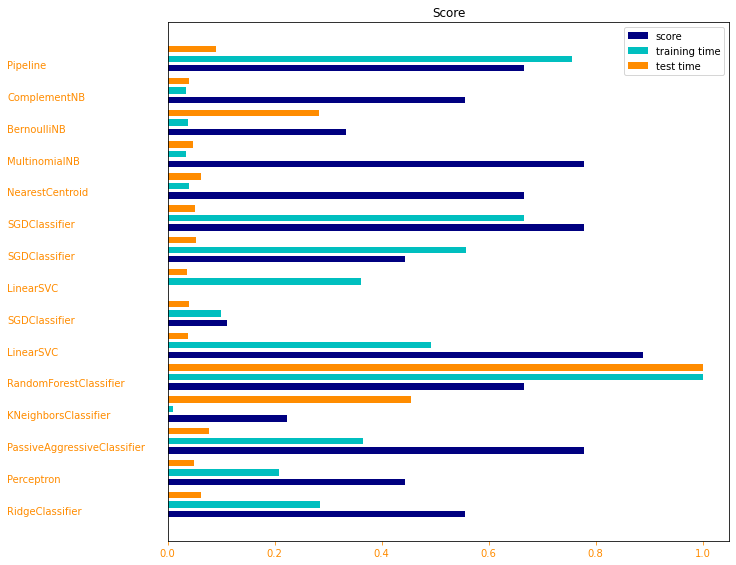

In [ ]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, 0.2, label="score", color="navy")
plt.barh(indices + 0.3, training_time, 0.2, label="training time", color="c")
plt.barh(indices + 0.6, test_time, 0.2, label="test time", color="darkorange")
plt.yticks(())
plt.legend(loc="best")
plt.subplots_adjust(left=0.25)
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(bottom=0.05)
plt.tick_params(axis='x', colors='darkorange')

for i, c in zip(indices, clf_names):    
    plt.text(-0.3, i, c, color="darkorange")
plt.show()

#(outdated) Split documents and train and evaluate classifier - Code 

In [ ]:
spacy.prefer_gpu()
nlp = spacy.load('de_dep_news_trf')
lemmatizer = spacy.lang.de.German()

In [ ]:
stop_words = [] # empty list
with open('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/stop_words_german.txt', 'r', encoding = 'utf8') as datafile:
    for line in datafile:
        for word in line.split():
            stop_words.append(word)
            stop_words.append(string.capwords(word))
            

def tokenize_and_stem(text):

    tokens = nltk.word_tokenize(text)   
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token)
    
    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #stems = filtered_tokens
    return stems
# def my_lemma(text):
#   spacy.load('de')
#   lemmatizer = spacy.lang.de.German()
  
#   tokens = lemmatizer(text)
#   lemmatized_tokens = [token.lemma_ for token in tokens]
#   return lemmatized_tokens

In [ ]:
stop_words = [] # empty list
with open('/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/stop_words_german.txt', 'r', encoding = 'utf8') as datafile:
    for line in datafile:
        for word in line.split():
            stop_words.append(word)
            stop_words.append(string.capwords(word))
            


def tokenize_and_lemma(text):

    tokens = nltk.word_tokenize(text)
      
    filtered_tokens = []

    lemmas = []
    
    stemmer = SnowballStemmer("german")

    tagger = ht.HanoverTagger('morphmodel_ger.pgz')

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:      
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          #if token not in stop_words:
            if len(token) > 1:
              if deutsch.check(token) == True:                                     
                lemma = [lemma for (word,lemma,pos) in tagger.tag_sent(token.split())]
                if lemma != ['--']:     
                  lemma_low = (map(lambda x: x.lower(), lemma))             
                  lemmas.append(' '.join(lemma_low))                  
    return lemma

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# create a dataframe from a word matrix
def wm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)
  
# set of documents
a = "Unter einem Projekt versteht man eine zeitlich und sachlich begrenzte in sich abgeschlossene Aufgabe, deren erfolgreiche Erledigung das Projektziel realisiert."
b = "Wesentliche Merkmale eines Projekts sind daher:– Existenz eines Projektziels,– zeitliche Begrenzung durch einen Projektbeginn und ein Projektende,– vorgegebener Ressourcenrahmen (Budget, 6.1.3). Ein Projekt kann einen sehr unterschiedlichen Umfang besitzen, angefangenvon Aufgaben"
corpora = [a,b]

# instantiate the vectorizer object
cvec = CountVectorizer(analyzer = 'word', tokenizer=tokenize_and_stem, ngram_range=(1,2),min_df= 0.20)
#cvec = TfidfVectorizer(tokenizer=tokenize_and_stem, ngram_range=(1,3),min_df= 0.15)

# convert the documents into a document-term matrix
wm = cvec.fit_transform(corpora)

# retrieve the terms found in the corpora
tokens = cvec.get_feature_names_out()

# create a dataframe from the matrix
df = wm2df(wm, tokens)
print(df)

Classify and create frequency table for each Domain Area in the file.

In [ ]:
def tokenize_and_stem(text):

    tokens = nltk.word_tokenize(text)   
    filtered_tokens = []
    
    stemmer = SnowballStemmer("german")

    specialchar = ['.',',',';',':','"','-','(',')','[',']','{','}','/','//','>','<','=','+','-','#','@','::','+//','...']

    deutsch = enchant.Dict("de_DE_frami")
    
    for token in tokens:
      if any(map(str.isdigit, token)) == False:
        if token not in specialchar:
          if token not in stop_words:
            if len(token) > 2:
              if deutsch.check(token) == True:
                filtered_tokens.append(token)
    
    #exclude stopwords from stemmed words
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #stems = filtered_tokens
    return stems

def evaluate_classifier(title,classifier, vectorizer, X_test, y_test):
    X_test_tfidf = vectorizer.transform(X_test)
    y_pred = classifier.predict(X_test_tfidf)

    precision = metrics.precision_score(y_test, y_pred, average = 'micro')
    recall = metrics.recall_score(y_test, y_pred, average = 'micro')
    f1 = metrics.f1_score(y_test, y_pred, average = 'micro') 

    print("%s\t%f\t%f\t%f\n" % (title, precision, recall, f1))


def train_classifier(docs):
    doc_shuffled = shuffle(docs)
    
    X = doc_shuffled['TEXT']
    Y = doc_shuffled['LABEL']

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    

    # the object that turns text into vectors       


    vectorizer = CountVectorizer(ngram_range=(1,3), min_df = 3,analyzer = 'word', tokenizer=tokenize_and_stem)
    #vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=3,  analyzer = 'word',use_idf=True, tokenizer=tokenize_and_stem)
    
    # create doc-term matrix
    dtm = vectorizer.fit_transform(X_train)

    # train Naive Bayes classifier
    naive_bayes_classifier = MultinomialNB().fit(dtm,y_train)

    evaluate_classifier("Naive Bayes\tTRAIN\t", naive_bayes_classifier, vectorizer, X_train, y_train)
    evaluate_classifier("Naive Bayes\tTEST\t", naive_bayes_classifier, vectorizer, X_test, y_test)

    ##store the classifier
    clf_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/naive_bayes_classifier.pkl'
    pickle.dump(naive_bayes_classifier, open(clf_filename,'wb'))

    ##also store the vectorizer so we can transform new data
    vec_filename = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Files/count_vectorizer.pkl'
    pickle.dump(vectorizer, open(vec_filename,'wb'))



train_classifier(docs)
  

Automatically generate a .pdf but with Aspose-Words Watermark. Alternatively, open the above generated .docx file in a word-like editor and save as .pdf.

In [ ]:
!pip install aspose-words
# Import Aspose.Words for Python via .NET module
import aspose.words as aw

# Create and save a simple document
input = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_Norms/classified_Konstruktion.docx'
output = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/Classified_XML_Norms/classified_Konstruktion.pdf'
doc = aw.Document(input)

# Save the document to DOCX format.
doc.save(output)

################

In [ ]:
classified_flt.groupby(['Term', 'Domain Area']).size().unstack(fill_value=0)

classified_flt[['Term']].stack().groupby(level=1).apply(pd.value_counts).unstack(fill_value=0).T

classified_flt.apply(pd.value_counts).fillna(0).T

In [ ]:
dir = '/content/drive/MyDrive/ColabNotebooks/Norm_Classifier/XML_Norms2/'
fd = {}
folder_classified = pd.DataFrame(fd)
i = 0

for xml_doc in os.listdir(dir):      
  classified_df = xml_classifier(xml_doc)
  
  counts = classified_df['Domain Area'].value_counts()
  counts = counts.sort_index()
  
  folder_classified = folder_classified.append(counts)
  folder_classified = folder_classified.reset_index(drop=True)  
  folder_classified.at[i,'Document']=xml_doc
  i += 1
  
cols = folder_classified.columns.tolist()
cols = cols[-1:] + cols[:-1]
folder_classified = folder_classified[cols] 

print(folder_classified.head())  

                         Document  Fertigung  Forschung_und_Entwicklung  \
0  30022621_DIN_CEN_TS_1591-3.xml      459.0                       98.0   
1   30027785_DIN_EN_ISO_13704.xml      866.0                       15.0   
2       30008986_DIN_EN_13814.xml     1138.0                      320.0   

   Konstruktion  Kostenrechnung  Logistik  Management  Qualitaet  Sicherheit  
0          72.0            27.0      11.0         5.0       20.0       104.0  
1           2.0            33.0       2.0        21.0       31.0        42.0  
2         364.0           114.0     175.0        47.0      248.0       542.0  


In [ ]:
filename_pickle = '/content/drive/MyDrive/ColabNotebooks/Knowledge_seeker/Files/data_tokenized.pkl'
folder_classified= pd.read_pickle(filename_pickle)


In [ ]:
folder_classified

LABEL,Fertigung,Forschung_und_Entwicklung,Konstruktion,Kostenrechnung,Logistik,Management,Qualitaet,Sicherheit
TERM,,,,,,,,
-- h,0,0,1,0,0,0,0,0
-- j,0,0,7,0,0,0,0,0
-- v,0,0,2,0,0,0,0,0
-- w,0,0,1,0,0,0,0,0
-- wert,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...
übungsheft,0,0,1,0,0,0,0,0
übungsinhalte,0,1,0,0,0,0,0,0
übungsprozeß,0,0,0,0,1,0,0,0
